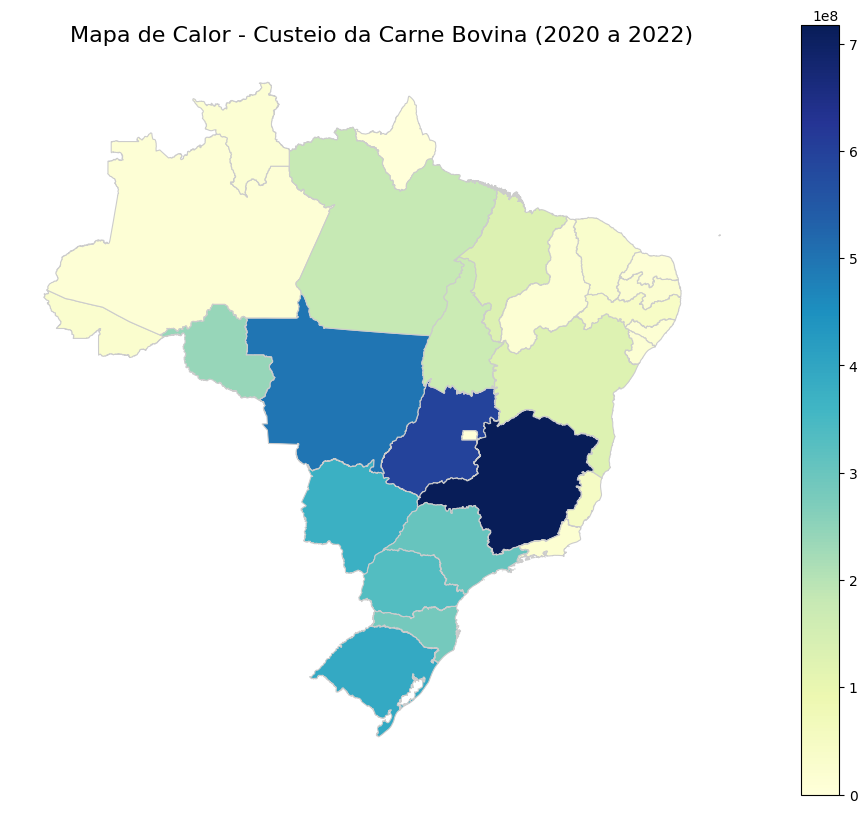

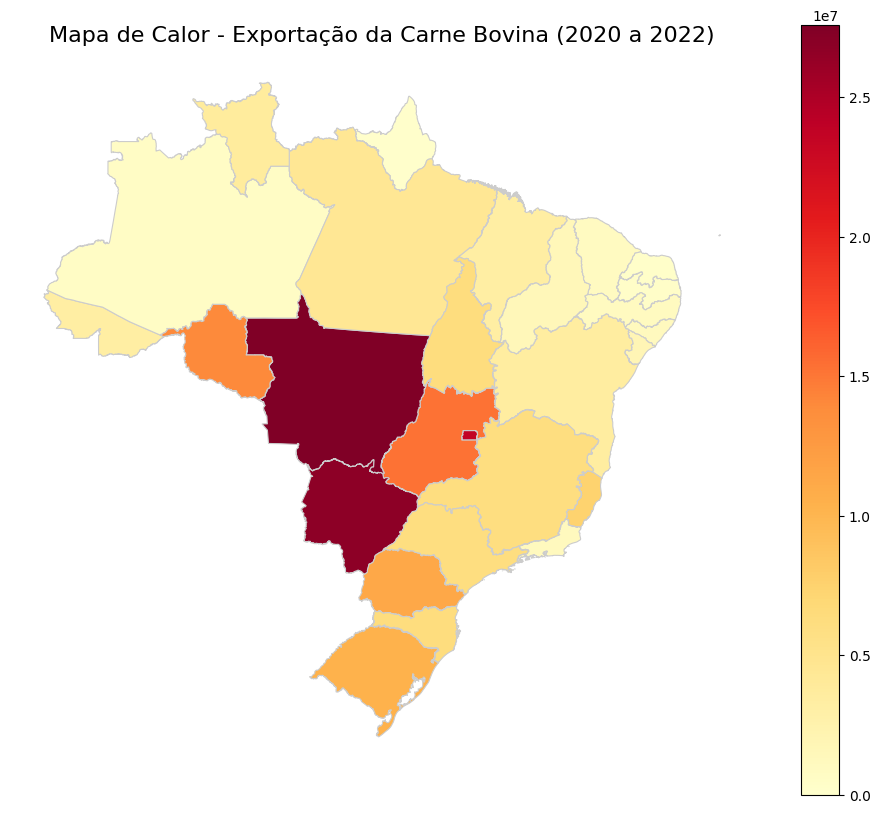

In [4]:
# Instalar as bibliotecas necessárias
!pip install geopandas openpyxl matplotlib

# Importar as bibliotecas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Ler os dados do arquivo Excel
file_path = '/content/custeio.xlsx'  # ajuste o caminho se necessário
custeio_df = pd.read_excel(file_path, sheet_name='Planilha1')
exportacao_df = pd.read_excel(file_path, sheet_name='Planilha2')

# Preparar os dados
# Selecionar apenas as colunas necessárias
custeio_df = custeio_df[['Região', 'Custeio 2020 a 2022']]
exportacao_df = exportacao_df[['Região', 'Exportação 2020 a 2022']]

# Agora, carregar o mapa dos estados do Brasil
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# O mapa usa nomes dos estados, vamos adicionar as siglas para juntar corretamente
# Criar dicionário de nome para sigla
estado_para_sigla = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}
# Criar nova coluna "Sigla" no mapa
mapa_brasil['Sigla'] = mapa_brasil['name'].map(estado_para_sigla)

# Juntar os dados de custeio
mapa_custeio = mapa_brasil.merge(custeio_df, left_on='Sigla', right_on='Região')

# Juntar os dados de exportação
mapa_exportacao = mapa_brasil.merge(exportacao_df, left_on='Sigla', right_on='Região')

# Definir valores máximos para escala ser automática
vmax_custeio = mapa_custeio['Custeio 2020 a 2022'].max()
vmax_exportacao = mapa_exportacao['Exportação 2020 a 2022'].max()

# Plotar o mapa de Custeio
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa_custeio.plot(
    column='Custeio 2020 a 2022',
    cmap='YlGnBu',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    vmin=0,
    vmax=vmax_custeio,
    ax=ax
)
ax.set_title('Mapa de Calor - Custeio da Carne Bovina (2020 a 2022)', fontsize=16)
ax.axis('off')
plt.show()

# Plotar o mapa de Exportação
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa_exportacao.plot(
    column='Exportação 2020 a 2022',
    cmap='YlOrRd',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    vmin=0,
    vmax=vmax_exportacao,
    ax=ax
)
ax.set_title('Mapa de Calor - Exportação da Carne Bovina (2020 a 2022)', fontsize=16)
ax.axis('off')
plt.show()


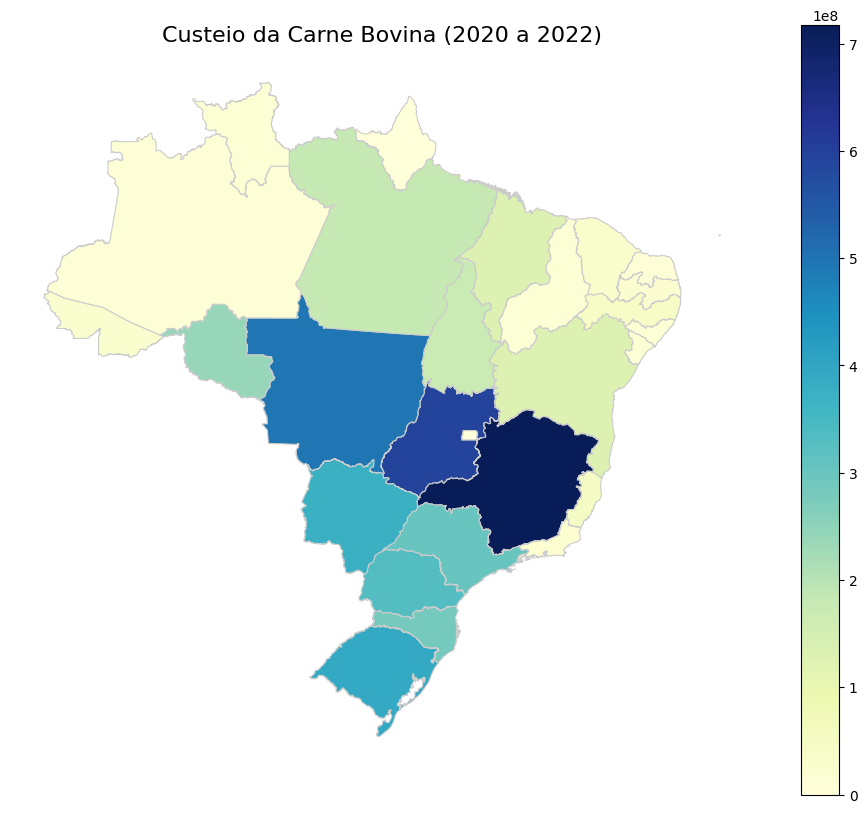

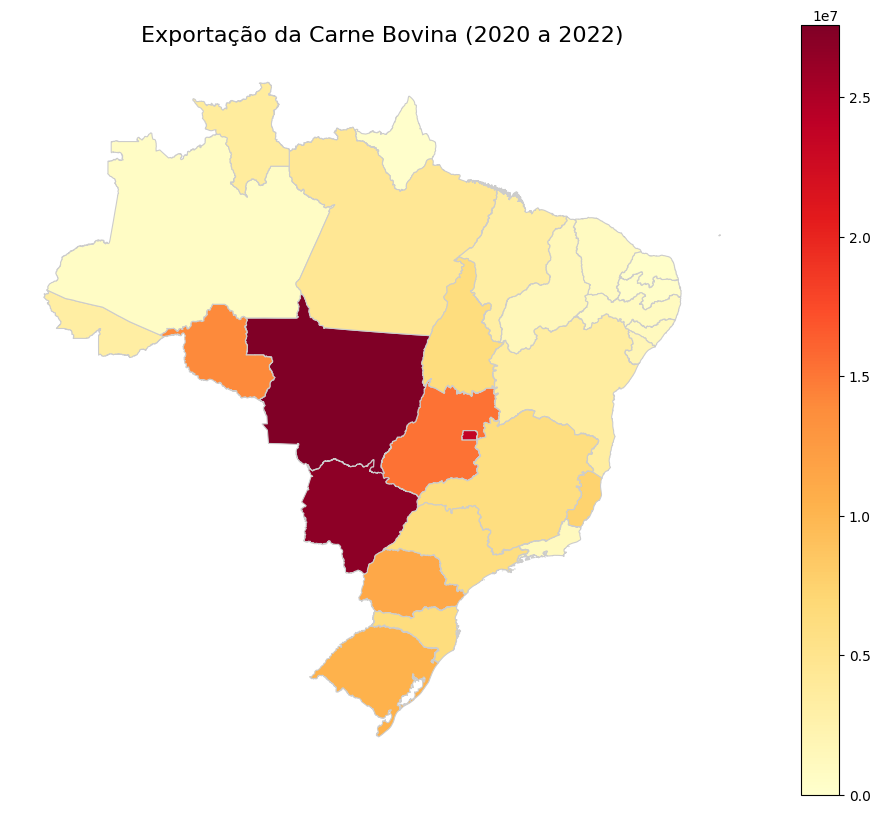

In [5]:
# Instalar as bibliotecas necessárias
!pip install geopandas openpyxl matplotlib

# Importar as bibliotecas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Ler os dados do arquivo Excel
file_path = '/content/custeio.xlsx'  # ajuste o caminho se necessário
custeio_df = pd.read_excel(file_path, sheet_name='Planilha1')
exportacao_df = pd.read_excel(file_path, sheet_name='Planilha2')

# Preparar os dados
custeio_df = custeio_df[['Região', 'Custeio 2020 a 2022']]
exportacao_df = exportacao_df[['Região', 'Exportação 2020 a 2022']]

# Carregar o mapa dos estados do Brasil
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Criar dicionário de nome para sigla
estado_para_sigla = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}
mapa_brasil['Sigla'] = mapa_brasil['name'].map(estado_para_sigla)

# Juntar os dados de custeio e exportação
mapa_custeio = mapa_brasil.merge(custeio_df, left_on='Sigla', right_on='Região')
mapa_exportacao = mapa_brasil.merge(exportacao_df, left_on='Sigla', right_on='Região')

# Definir valores máximos
vmax_custeio = mapa_custeio['Custeio 2020 a 2022'].max()
vmax_exportacao = mapa_exportacao['Exportação 2020 a 2022'].max()

# Plotar o mapa de Custeio
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa_custeio.plot(
    column='Custeio 2020 a 2022',
    cmap='YlGnBu',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    vmin=0,
    vmax=vmax_custeio,
    ax=ax
)
ax.set_title('Custeio da Carne Bovina (2020 a 2022)', fontsize=16)
ax.axis('off')
plt.show()

# Plotar o mapa de Exportação
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa_exportacao.plot(
    column='Exportação 2020 a 2022',
    cmap='YlOrRd',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    vmin=0,
    vmax=vmax_exportacao,
    ax=ax
)
ax.set_title('Exportação da Carne Bovina (2020 a 2022)', fontsize=16)
ax.axis('off')
plt.show()


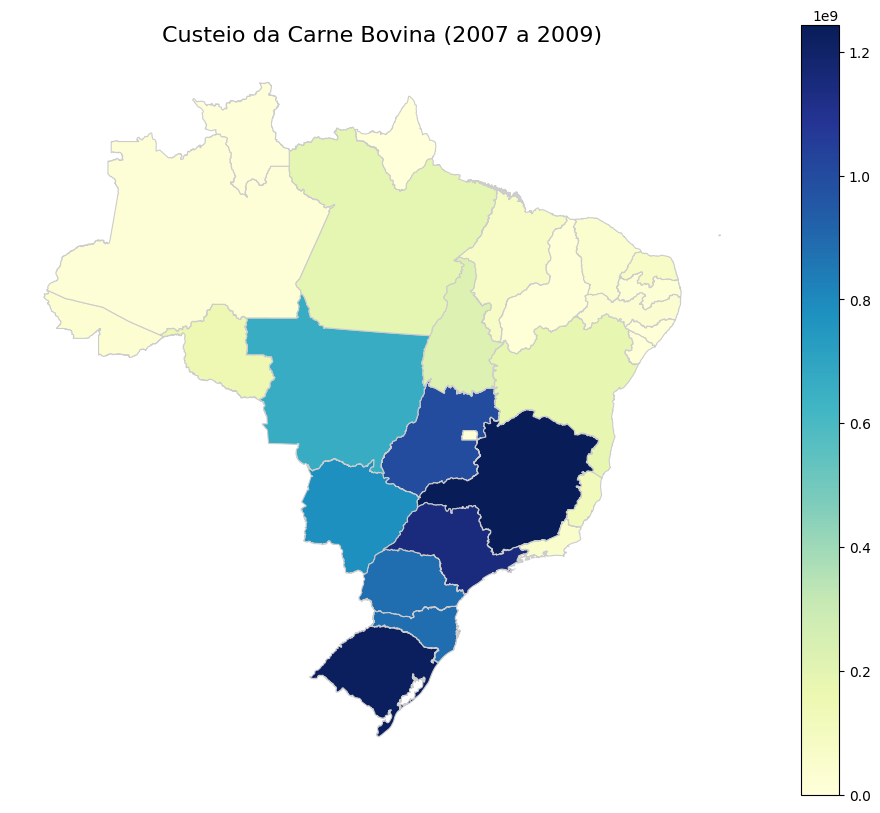

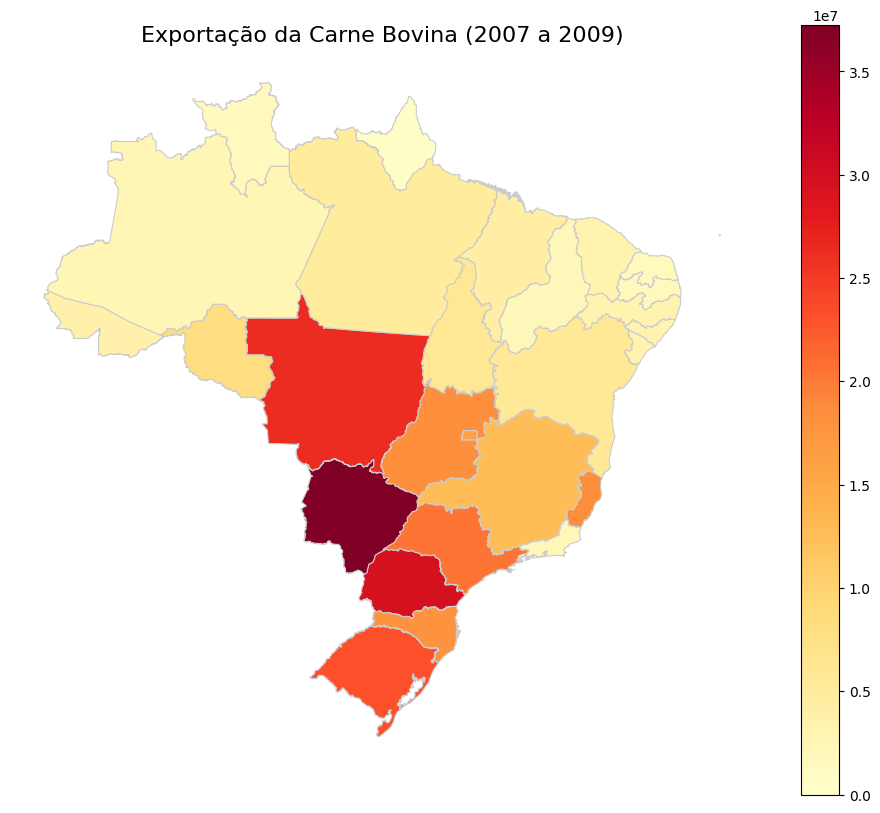

In [6]:
# Instalar as bibliotecas necessárias
!pip install geopandas openpyxl matplotlib

# Importar as bibliotecas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Ler os dados do arquivo Excel
file_path = '/content/custeio.xlsx'  # ajuste o caminho se necessário
custeio_df = pd.read_excel(file_path, sheet_name='Planilha1')
exportacao_df = pd.read_excel(file_path, sheet_name='Planilha2')

# Preparar os dados
custeio_df = custeio_df[['Região', 'Custeio 2007 a 2009']]
exportacao_df = exportacao_df[['Região', 'Exportação 2007 a 2009']]

# Carregar o mapa dos estados do Brasil
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Criar dicionário de nome para sigla
estado_para_sigla = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}
mapa_brasil['Sigla'] = mapa_brasil['name'].map(estado_para_sigla)

# Juntar os dados de custeio e exportação
mapa_custeio = mapa_brasil.merge(custeio_df, left_on='Sigla', right_on='Região')
mapa_exportacao = mapa_brasil.merge(exportacao_df, left_on='Sigla', right_on='Região')

# Definir valores máximos
vmax_custeio = mapa_custeio['Custeio 2007 a 2009'].max()
vmax_exportacao = mapa_exportacao['Exportação 2007 a 2009'].max()

# Plotar o mapa de Custeio
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa_custeio.plot(
    column='Custeio 2007 a 2009',
    cmap='YlGnBu',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    vmin=0,
    vmax=vmax_custeio,
    ax=ax
)
ax.set_title('Custeio da Carne Bovina (2007 a 2009)', fontsize=16)
ax.axis('off')
plt.show()

# Plotar o mapa de Exportação
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa_exportacao.plot(
    column='Exportação 2007 a 2009',
    cmap='YlOrRd',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    vmin=0,
    vmax=vmax_exportacao,
    ax=ax
)
ax.set_title('Exportação da Carne Bovina (2007 a 2009)', fontsize=16)
ax.axis('off')
plt.show()


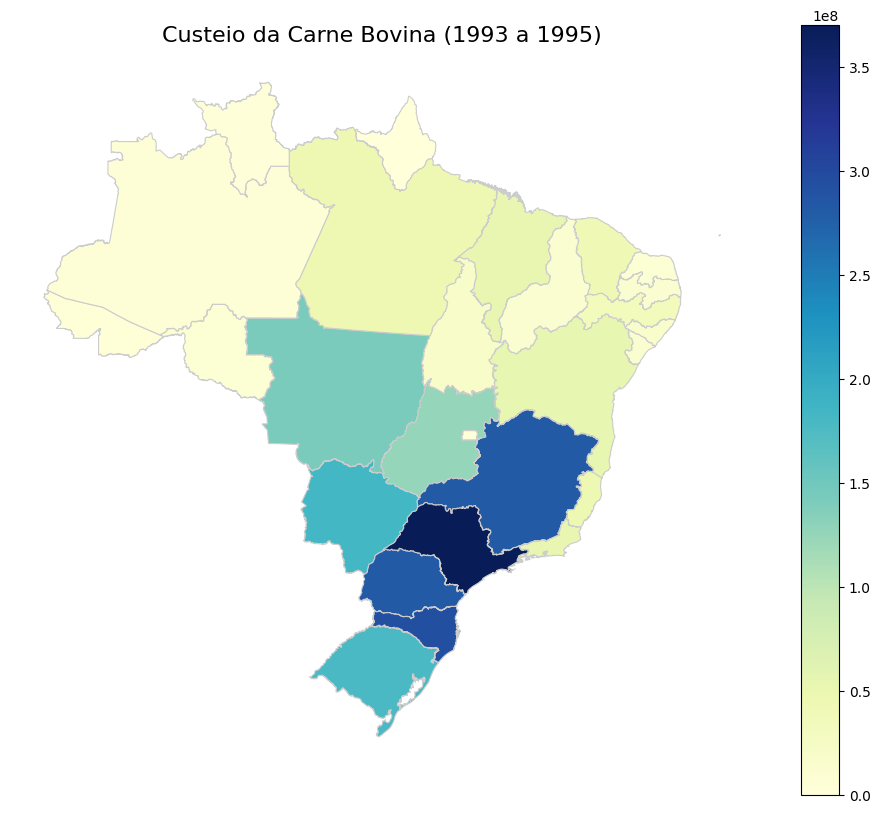

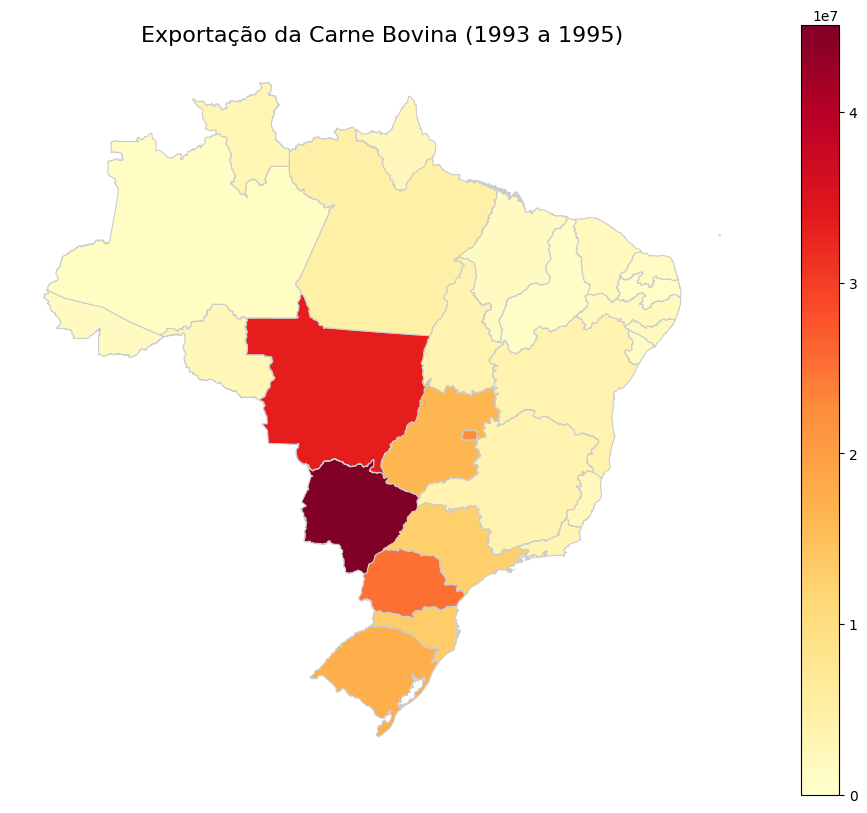

In [7]:
# Instalar as bibliotecas necessárias
!pip install geopandas openpyxl matplotlib

# Importar as bibliotecas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Ler os dados do arquivo Excel
file_path = '/content/custeio.xlsx'  # ajuste o caminho se necessário
custeio_df = pd.read_excel(file_path, sheet_name='Planilha1')
exportacao_df = pd.read_excel(file_path, sheet_name='Planilha2')

# Preparar os dados
custeio_df = custeio_df[['Região', 'Custeio 1993 a 1995']]
exportacao_df = exportacao_df[['Região', 'Exportação 1993 a 1995']]

# Carregar o mapa dos estados do Brasil
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Criar dicionário de nome para sigla
estado_para_sigla = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}
mapa_brasil['Sigla'] = mapa_brasil['name'].map(estado_para_sigla)

# Juntar os dados de custeio e exportação
mapa_custeio = mapa_brasil.merge(custeio_df, left_on='Sigla', right_on='Região')
mapa_exportacao = mapa_brasil.merge(exportacao_df, left_on='Sigla', right_on='Região')

# Definir valores máximos
vmax_custeio = mapa_custeio['Custeio 1993 a 1995'].max()
vmax_exportacao = mapa_exportacao['Exportação 1993 a 1995'].max()

# Plotar o mapa de Custeio
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa_custeio.plot(
    column='Custeio 1993 a 1995',
    cmap='YlGnBu',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    vmin=0,
    vmax=vmax_custeio,
    ax=ax
)
ax.set_title('Custeio da Carne Bovina (1993 a 1995)', fontsize=16)
ax.axis('off')
plt.show()

# Plotar o mapa de Exportação
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa_exportacao.plot(
    column='Exportação 1993 a 1995',
    cmap='YlOrRd',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    vmin=0,
    vmax=vmax_exportacao,
    ax=ax
)
ax.set_title('Exportação da Carne Bovina (1993 a 1995)', fontsize=16)
ax.axis('off')
plt.show()


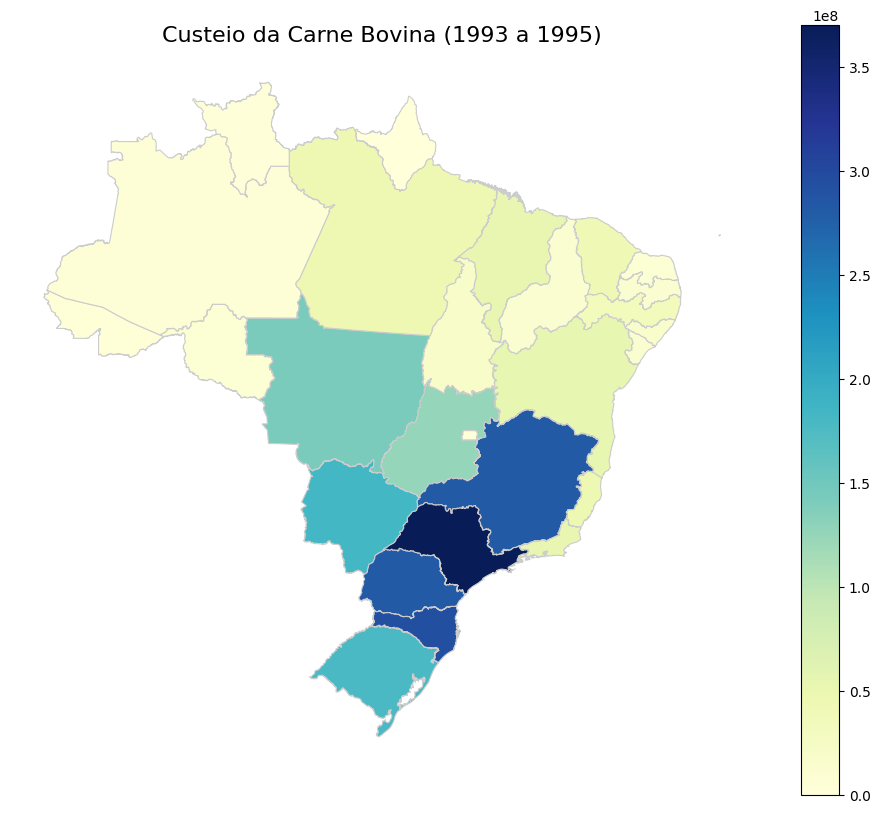

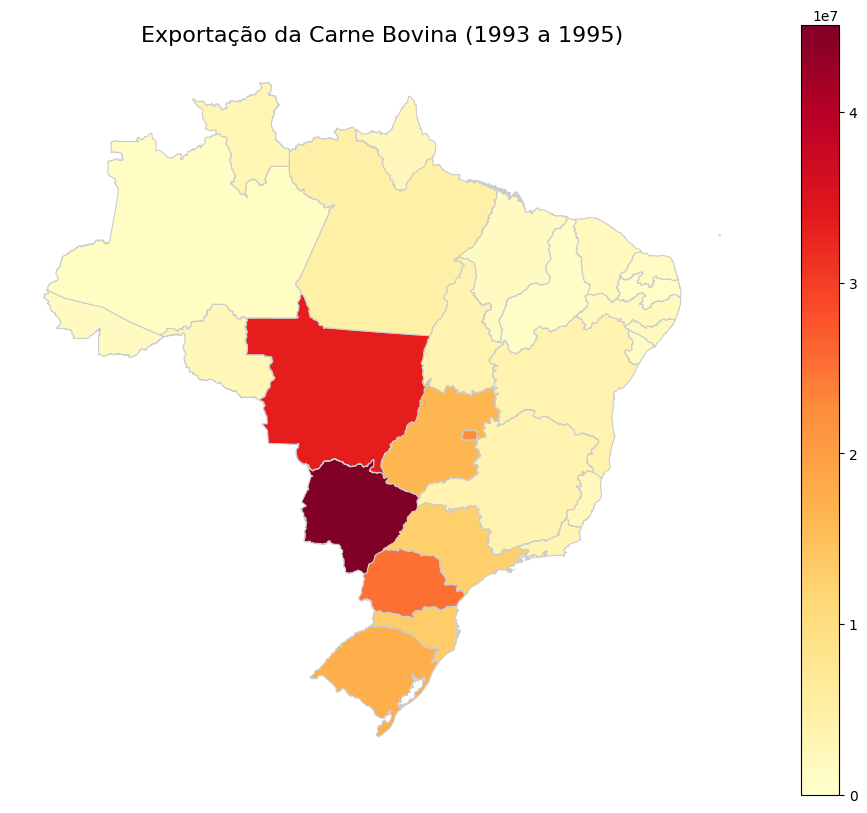

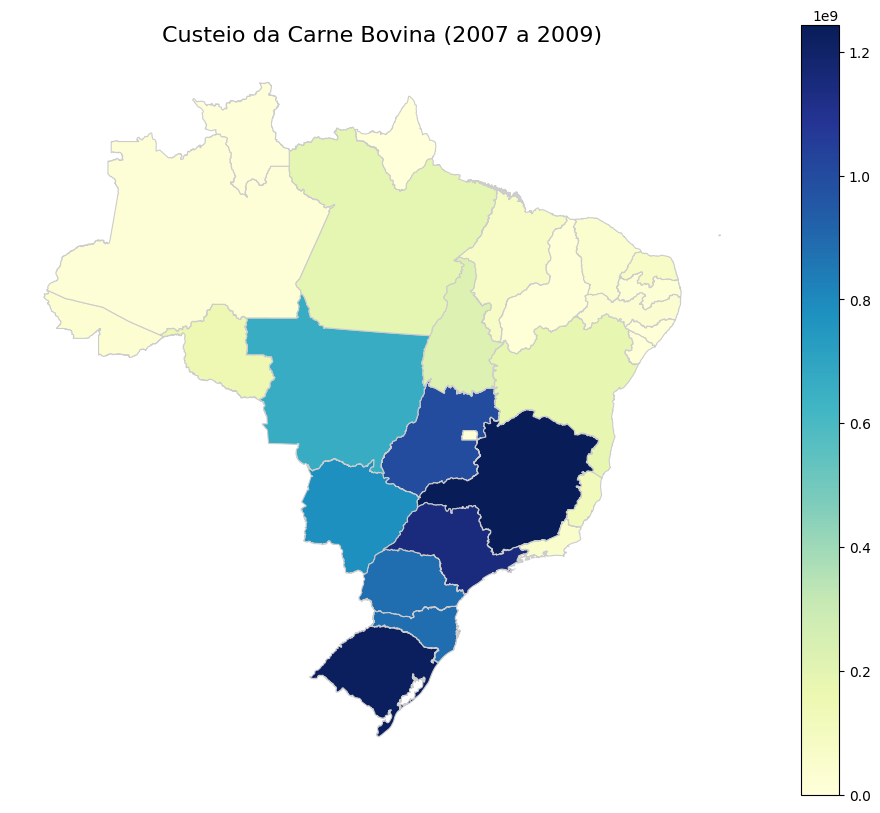

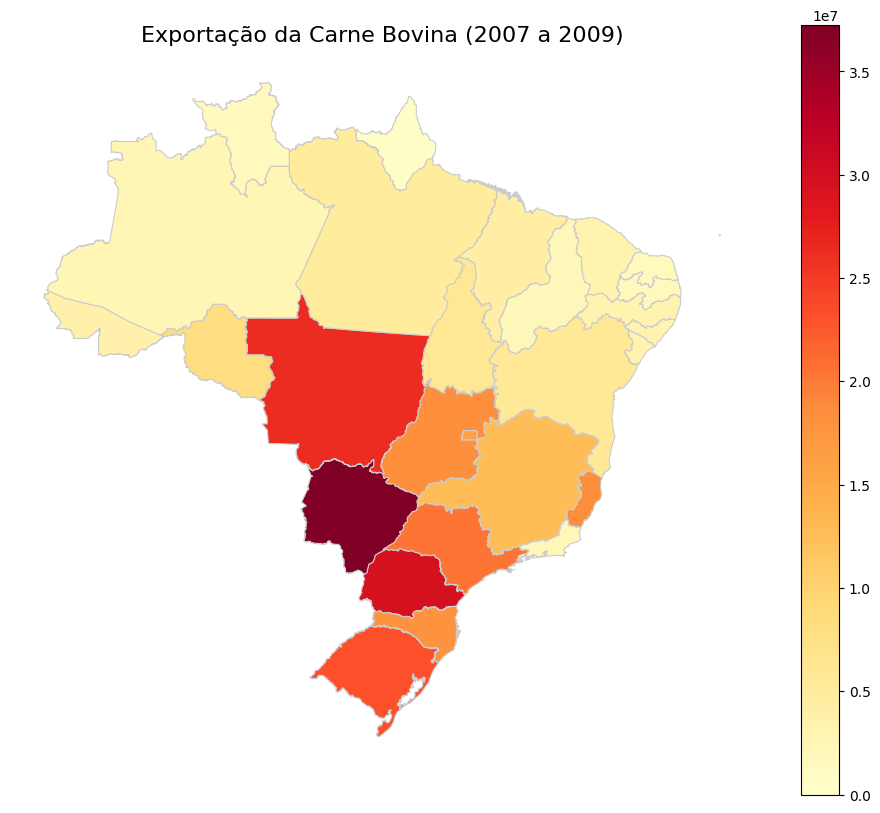

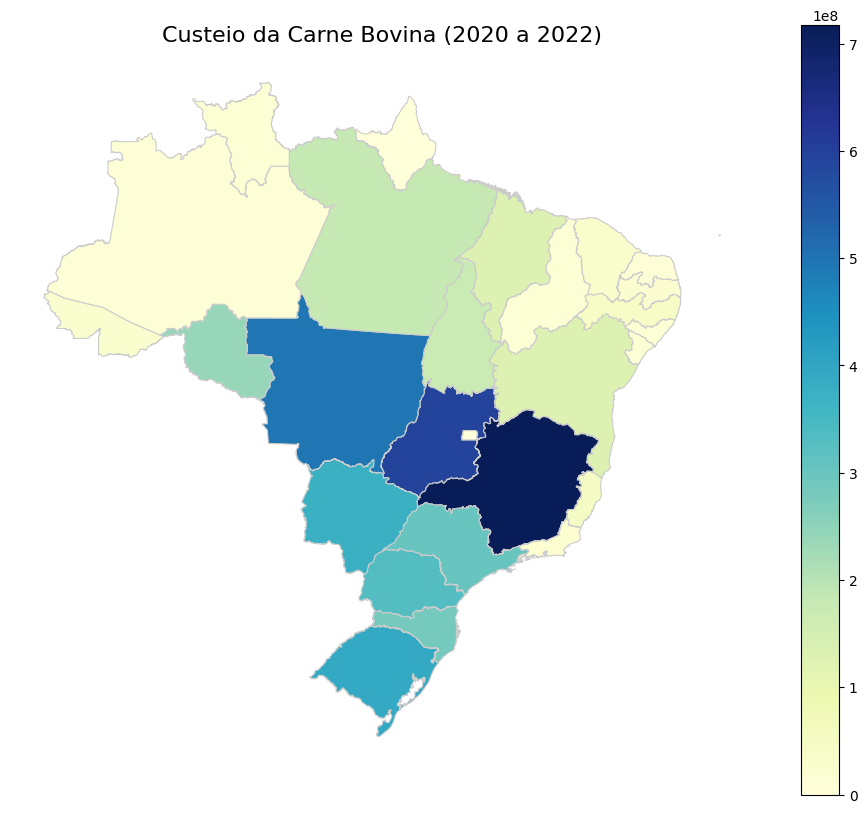

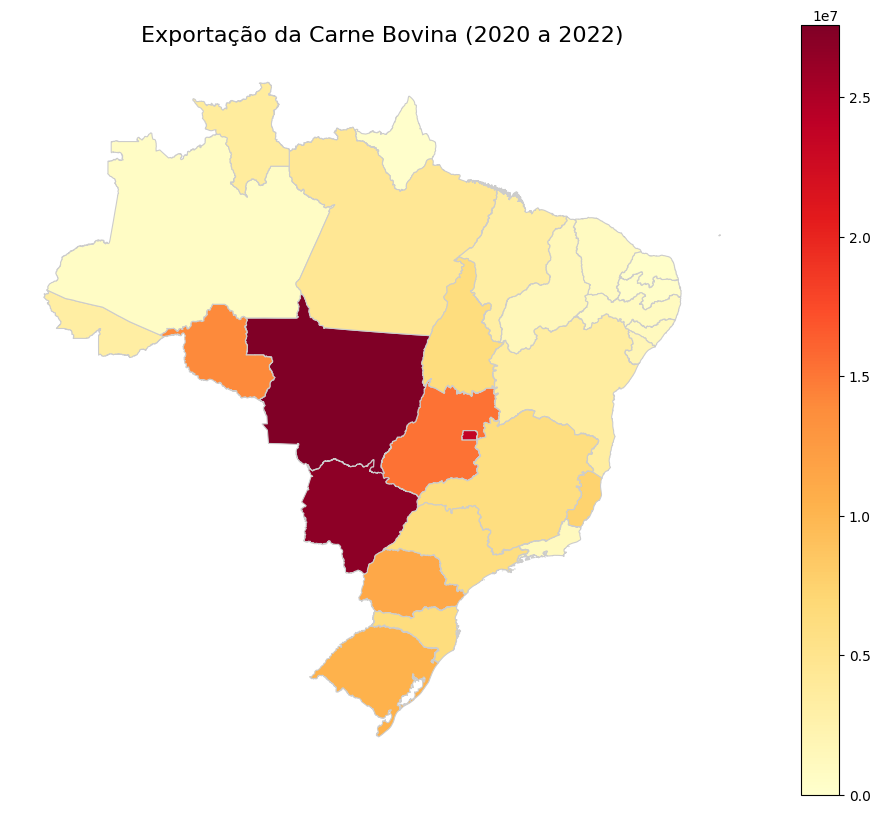

In [9]:


# Ler os dados do arquivo Excel
file_path = '/content/custeio.xlsx'  # ajuste o caminho se necessário
custeio_df = pd.read_excel(file_path, sheet_name='Planilha1')
exportacao_df = pd.read_excel(file_path, sheet_name='Planilha2')

# Carregar o mapa dos estados do Brasil
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Criar dicionário de nome para sigla
estado_para_sigla = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}
mapa_brasil['Sigla'] = mapa_brasil['name'].map(estado_para_sigla)

# Função para gerar os mapas
def plotar_mapa(periodo):
    # Pegar as colunas corretas
    coluna_custeio = f'Custeio {periodo}'
    coluna_exportacao = f'Exportação {periodo}'

    # Preparar os dados
    custeio = custeio_df[['Região', coluna_custeio]]
    exportacao = exportacao_df[['Região', coluna_exportacao]]

    # Juntar com o mapa
    mapa_custeio = mapa_brasil.merge(custeio, left_on='Sigla', right_on='Região')
    mapa_exportacao = mapa_brasil.merge(exportacao, left_on='Sigla', right_on='Região')

    # Definir máximos para escala
    vmax_custeio = mapa_custeio[coluna_custeio].max()
    vmax_exportacao = mapa_exportacao[coluna_exportacao].max()

    # Plotar custeio
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    mapa_custeio.plot(
        column=coluna_custeio,
        cmap='YlGnBu',
        linewidth=0.8,
        edgecolor='0.8',
        legend=True,
        vmin=0,
        vmax=vmax_custeio,
        ax=ax
    )
    ax.set_title(f'Custeio da Carne Bovina ({periodo})', fontsize=16)
    ax.axis('off')
    plt.show()

    # Plotar exportação
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    mapa_exportacao.plot(
        column=coluna_exportacao,
        cmap='YlOrRd',
        linewidth=0.8,
        edgecolor='0.8',
        legend=True,
        vmin=0,
        vmax=vmax_exportacao,
        ax=ax
    )
    ax.set_title(f'Exportação da Carne Bovina ({periodo})', fontsize=16)
    ax.axis('off')
    plt.show()

# Chamar a função para todos os períodos
periodos = ['1993 a 1995', '2007 a 2009', '2020 a 2022']

for periodo in periodos:
    plotar_mapa(periodo)


Máximo Custeio: 1244324691
Máximo Exportação: 45140475


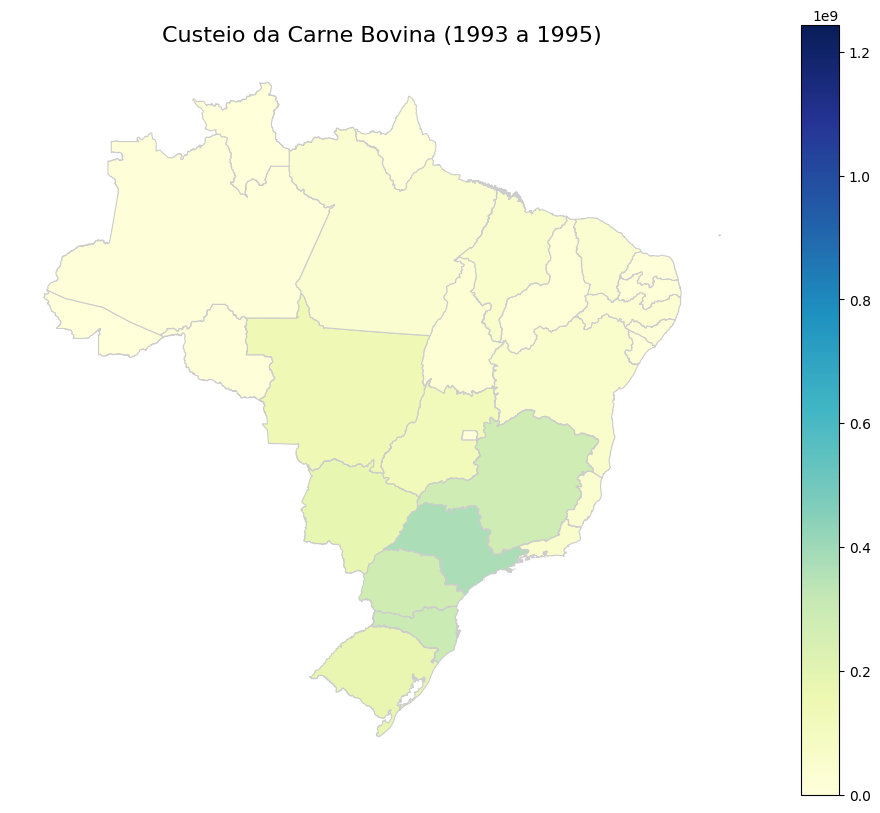

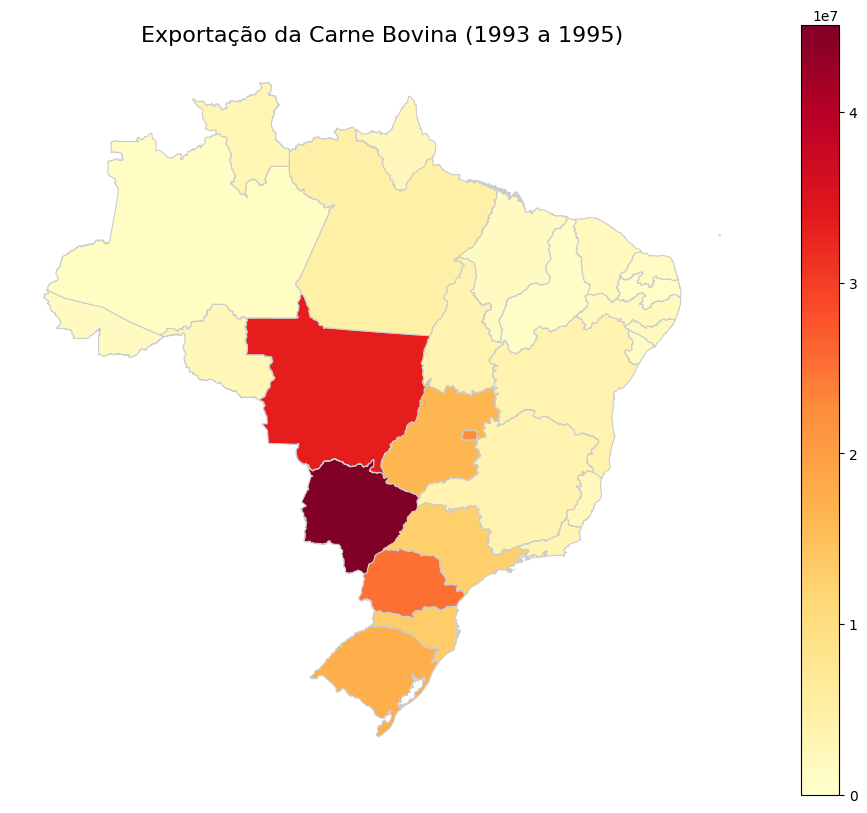

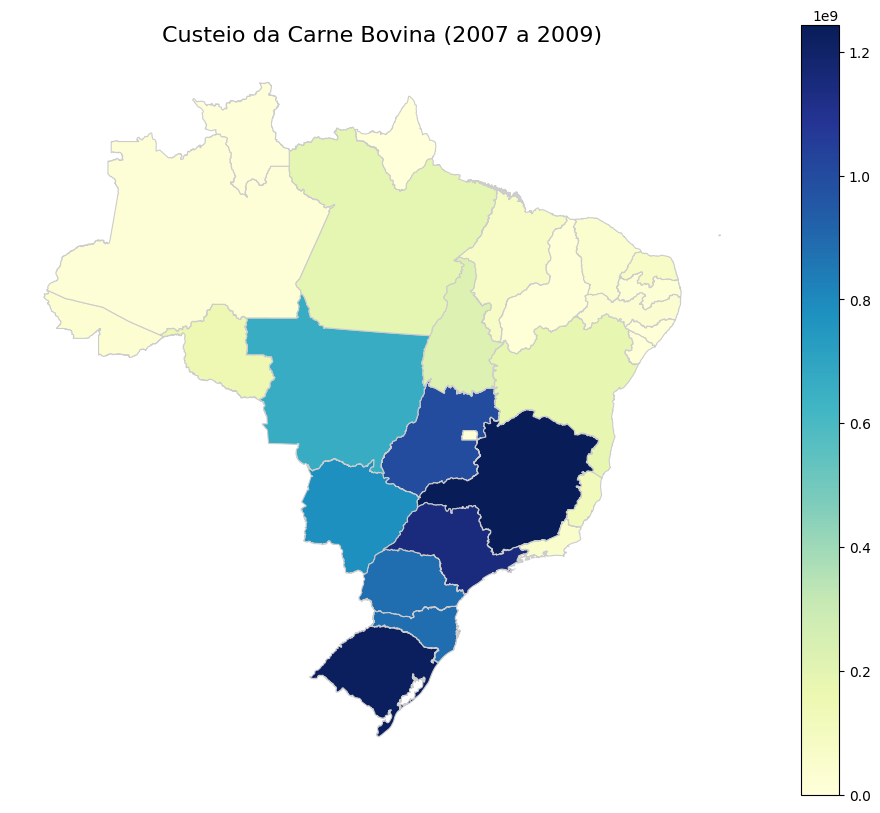

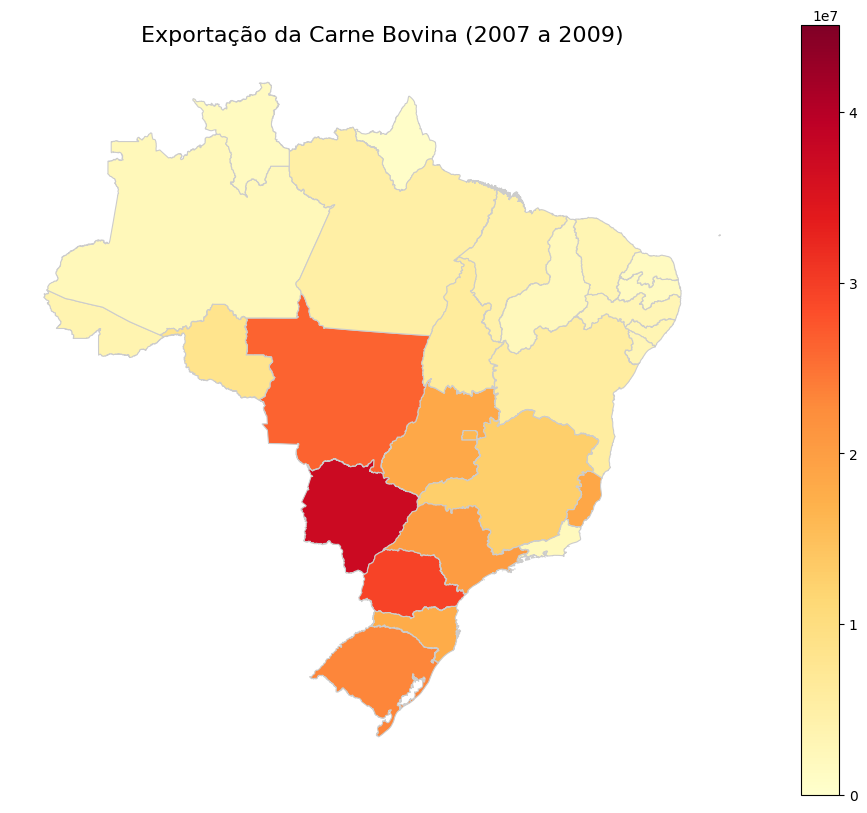

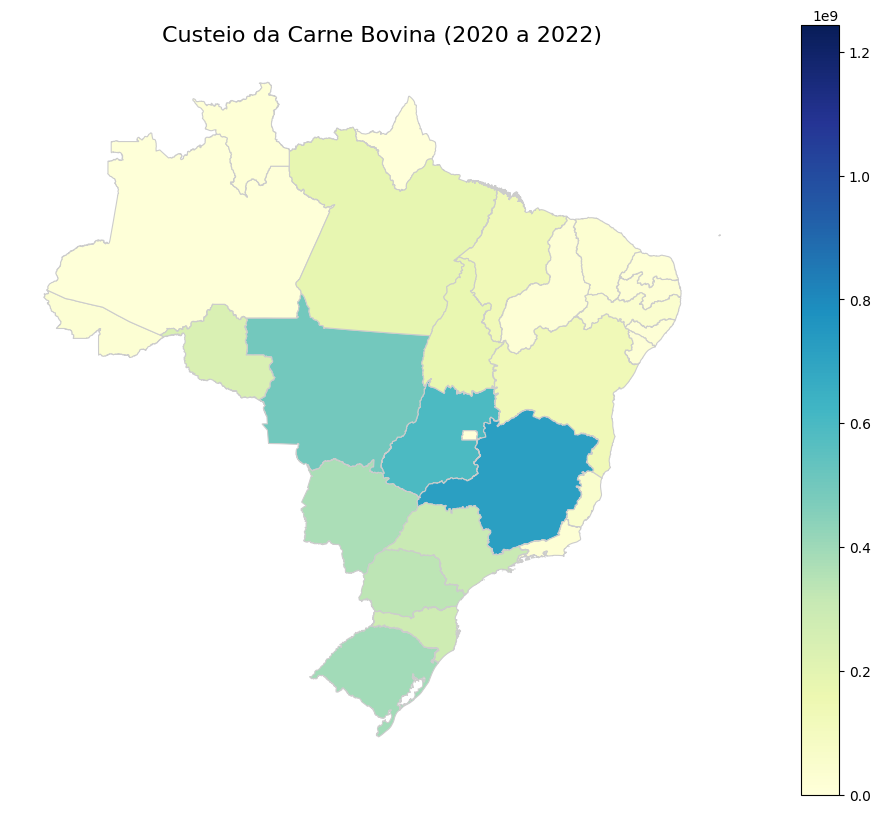

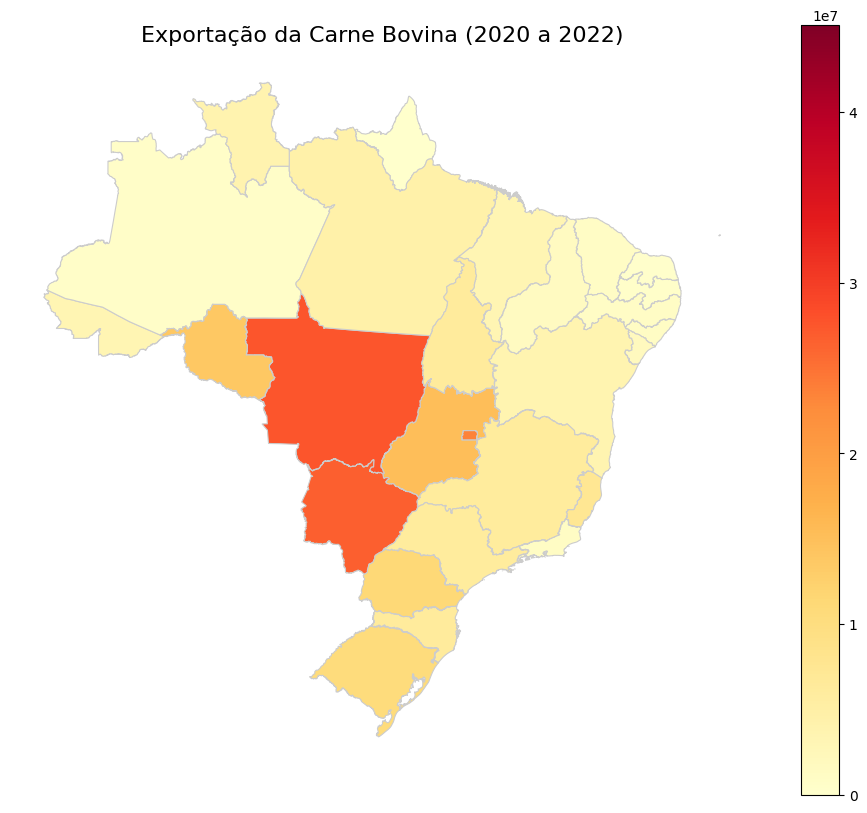

In [10]:
# Instalar as bibliotecas necessárias
!pip install geopandas openpyxl matplotlib

# Importar as bibliotecas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Ler os dados do arquivo Excel
file_path = '/content/custeio.xlsx'  # ajuste o caminho se necessário
custeio_df = pd.read_excel(file_path, sheet_name='Planilha1')
exportacao_df = pd.read_excel(file_path, sheet_name='Planilha2')

# Carregar o mapa dos estados do Brasil
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Criar dicionário de nome para sigla
estado_para_sigla = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}
mapa_brasil['Sigla'] = mapa_brasil['name'].map(estado_para_sigla)

# Listar os períodos
periodos = ['1993 a 1995', '2007 a 2009', '2020 a 2022']

# Calcular o valor máximo geral
vmax_custeio = custeio_df[[f'Custeio {periodo}' for periodo in periodos]].max().max()
vmax_exportacao = exportacao_df[[f'Exportação {periodo}' for periodo in periodos]].max().max()

print(f'Máximo Custeio: {vmax_custeio}')
print(f'Máximo Exportação: {vmax_exportacao}')

# Função para gerar os mapas
def plotar_mapa(periodo):
    # Pegar as colunas corretas
    coluna_custeio = f'Custeio {periodo}'
    coluna_exportacao = f'Exportação {periodo}'

    # Preparar os dados
    custeio = custeio_df[['Região', coluna_custeio]]
    exportacao = exportacao_df[['Região', coluna_exportacao]]

    # Juntar com o mapa
    mapa_custeio = mapa_brasil.merge(custeio, left_on='Sigla', right_on='Região')
    mapa_exportacao = mapa_brasil.merge(exportacao, left_on='Sigla', right_on='Região')

    # Plotar custeio
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    mapa_custeio.plot(
        column=coluna_custeio,
        cmap='YlGnBu',
        linewidth=0.8,
        edgecolor='0.8',
        legend=True,
        vmin=0,
        vmax=vmax_custeio,  # Sempre usando o mesmo valor máximo
        ax=ax
    )
    ax.set_title(f'Custeio da Carne Bovina ({periodo})', fontsize=16)
    ax.axis('off')
    plt.show()

    # Plotar exportação
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    mapa_exportacao.plot(
        column=coluna_exportacao,
        cmap='YlOrRd',
        linewidth=0.8,
        edgecolor='0.8',
        legend=True,
        vmin=0,
        vmax=vmax_exportacao,  # Sempre usando o mesmo valor máximo
        ax=ax
    )
    ax.set_title(f'Exportação da Carne Bovina ({periodo})', fontsize=16)
    ax.axis('off')
    plt.show()

# Rodar a função para todos os períodos
for periodo in periodos:
    plotar_mapa(periodo)


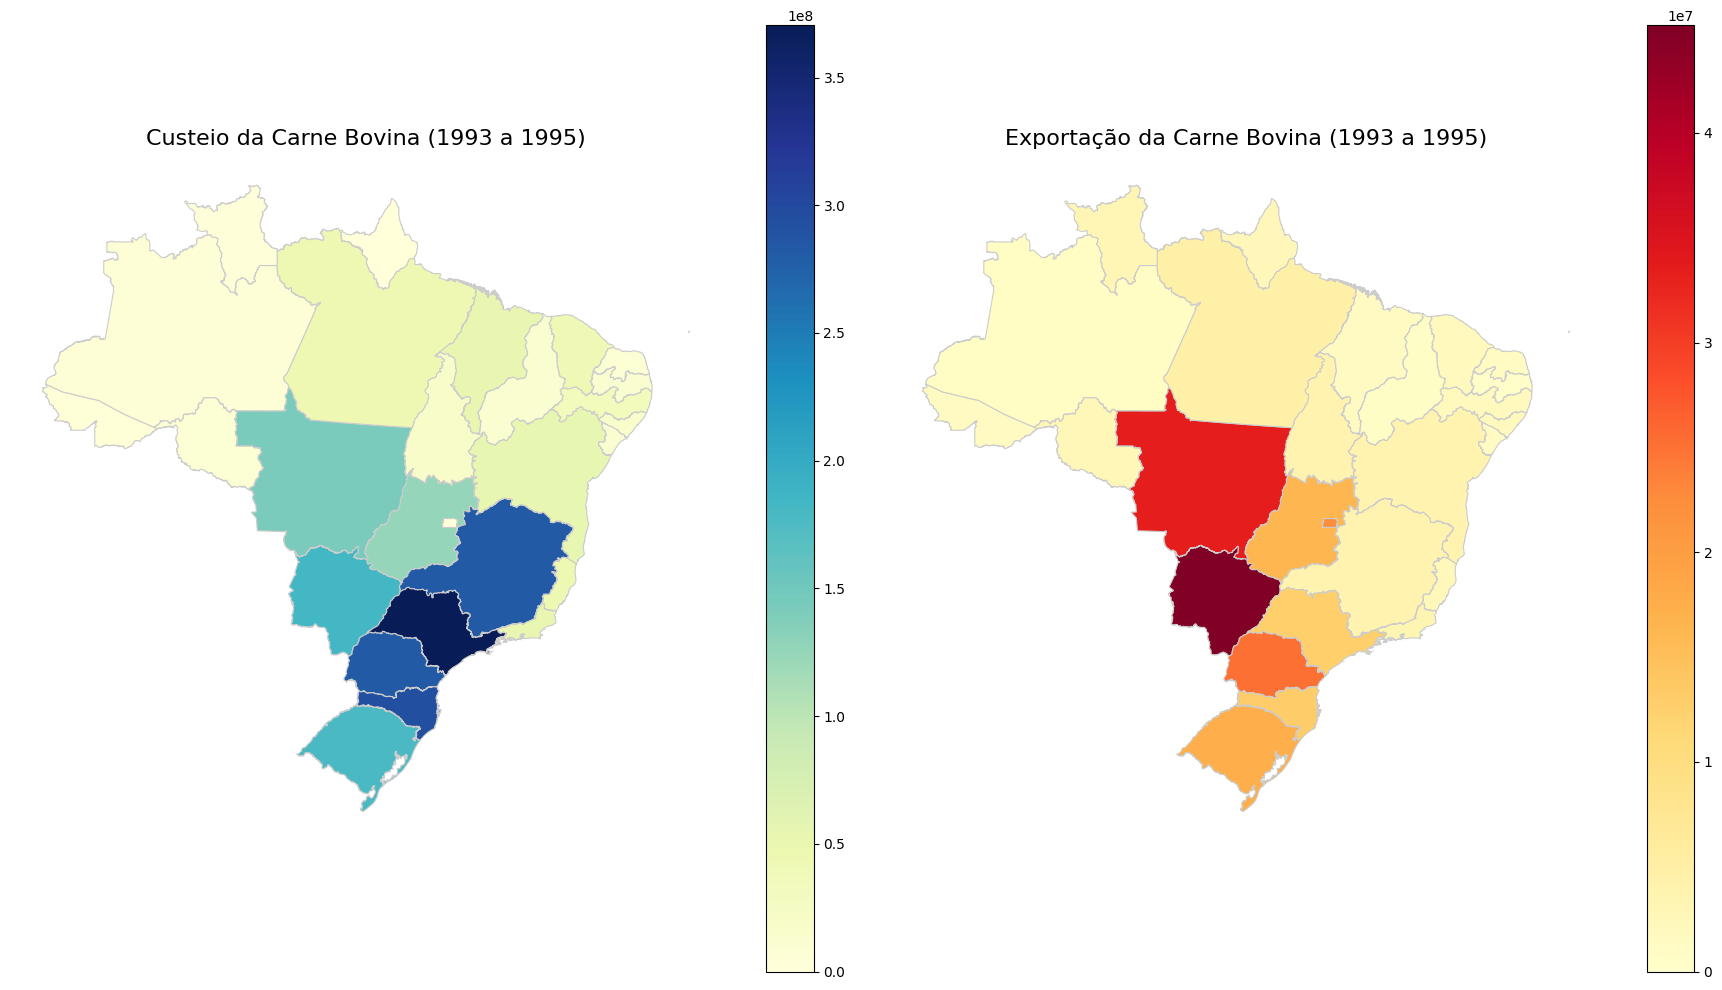

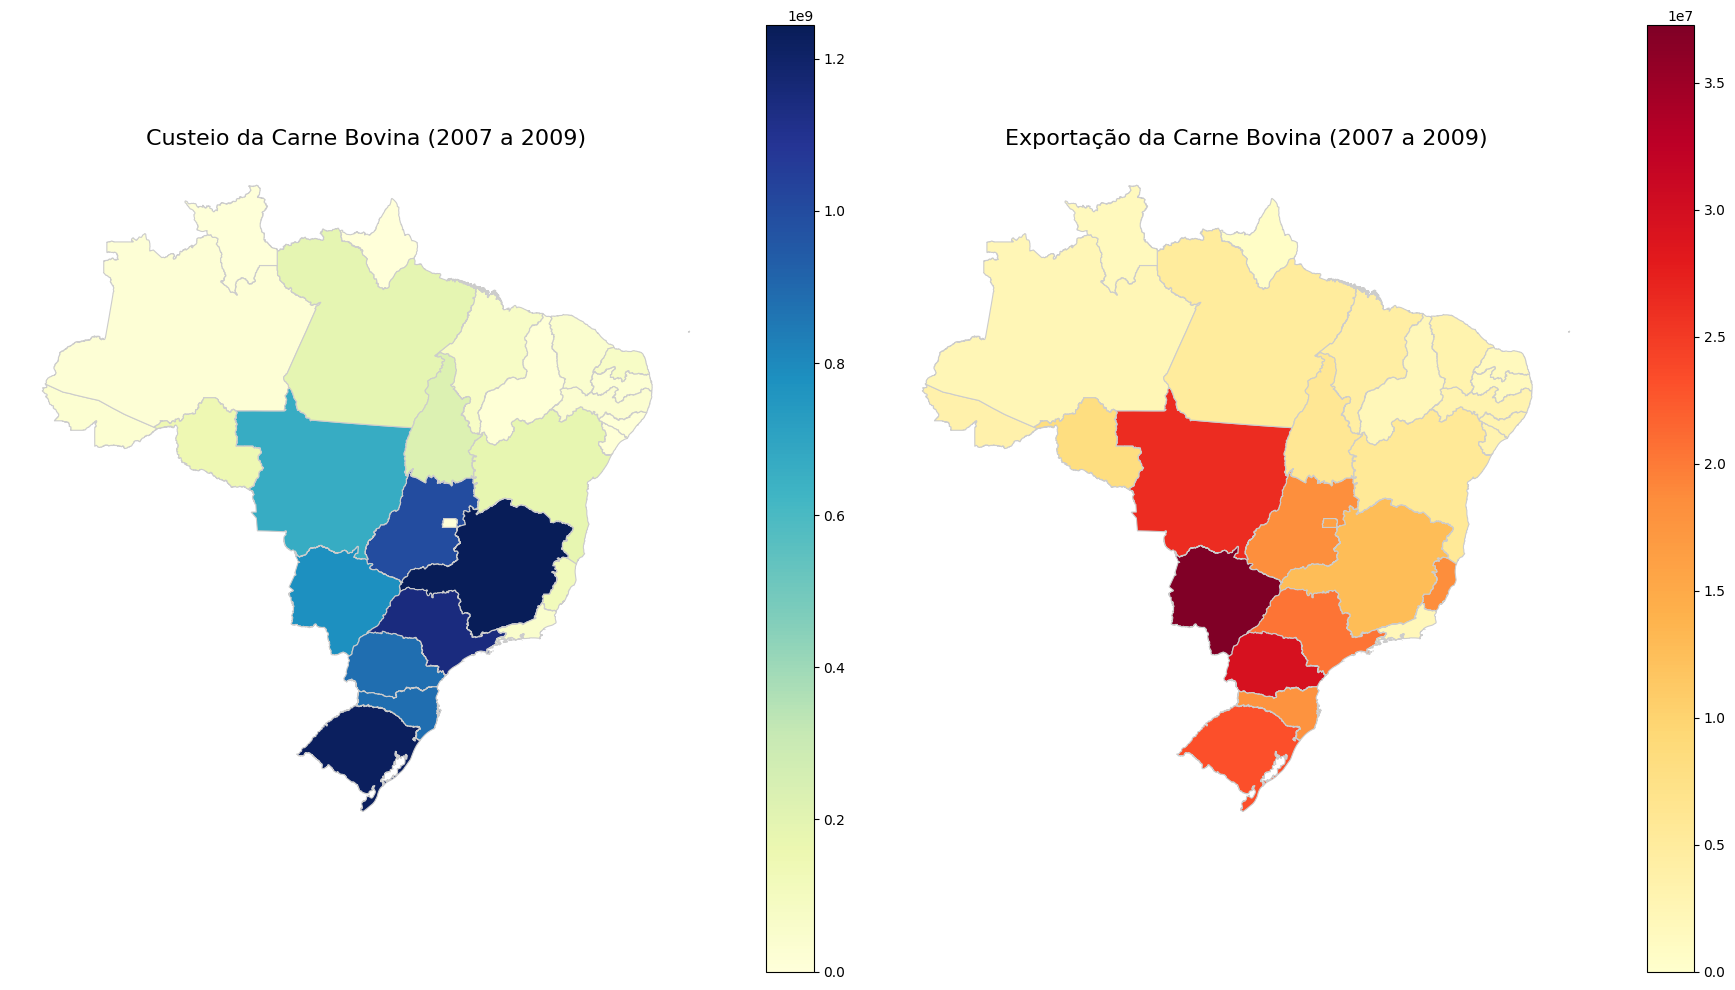

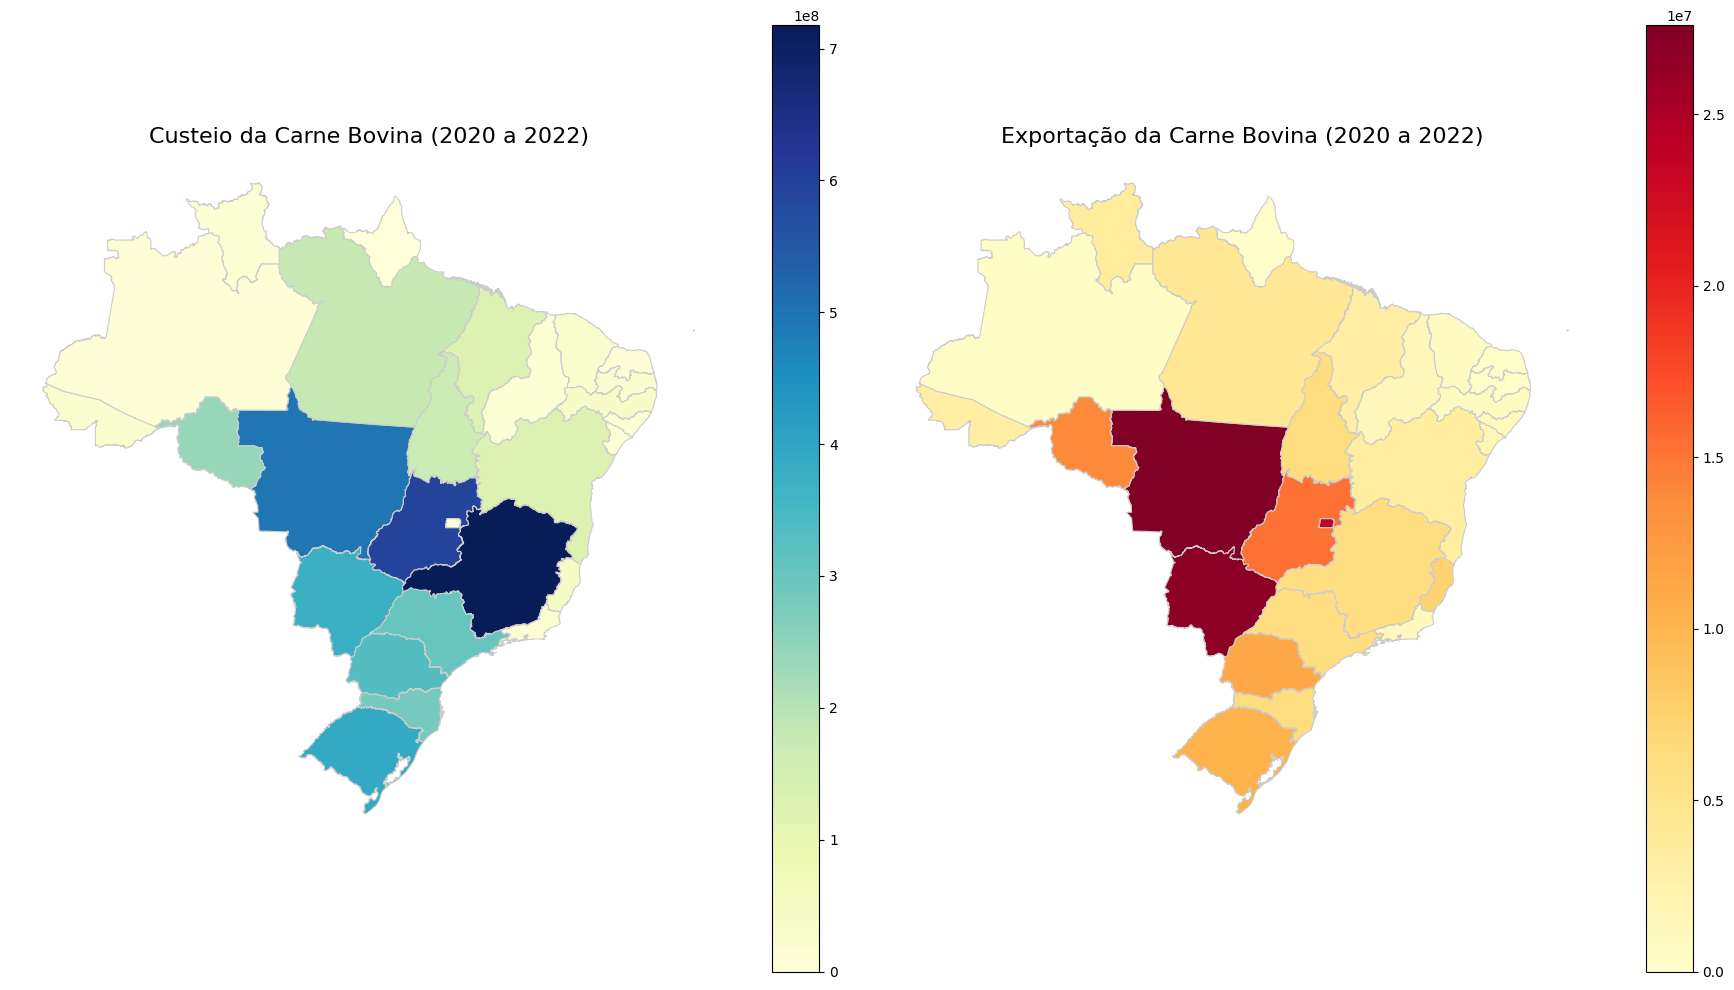

In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Ler os dados do arquivo Excel
file_path = '/content/custeio.xlsx'  # ajuste o caminho se necessário
custeio_df = pd.read_excel(file_path, sheet_name='Planilha1')
exportacao_df = pd.read_excel(file_path, sheet_name='Planilha2')

# Carregar o mapa dos estados do Brasil
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Criar dicionário de nome para sigla
estado_para_sigla = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}
mapa_brasil['Sigla'] = mapa_brasil['name'].map(estado_para_sigla)

# Função para gerar os mapas lado a lado
def plotar_mapa(periodo):
    # Pegar as colunas corretas
    coluna_custeio = f'Custeio {periodo}'
    coluna_exportacao = f'Exportação {periodo}'  # Usando a coluna de exportação

    # Preparar os dados
    custeio = custeio_df[['Região', coluna_custeio]]
    exportacao = exportacao_df[['Região', coluna_exportacao]]

    # Juntar com o mapa
    mapa_custeio = mapa_brasil.merge(custeio, left_on='Sigla', right_on='Região')
    mapa_exportacao = mapa_brasil.merge(exportacao, left_on='Sigla', right_on='Região')

    # Definir máximos para escala
    vmax_custeio = mapa_custeio[coluna_custeio].max()
    vmax_exportacao = mapa_exportacao[coluna_exportacao].max()

    # Plotar os mapas lado a lado
    fig, ax = plt.subplots(1, 2, figsize=(18, 10))  # Subplots lado a lado

    # Mapa de custeio
    mapa_custeio.plot(
        column=coluna_custeio,
        cmap='YlGnBu',
        linewidth=0.8,
        edgecolor='0.8',
        legend=True,
        vmin=0,
        vmax=vmax_custeio,
        ax=ax[0]
    )
    ax[0].set_title(f'Custeio da Carne Bovina ({periodo})', fontsize=16)
    ax[0].axis('off')

    # Mapa de exportação
    mapa_exportacao.plot(
        column=coluna_exportacao,
        cmap='YlOrRd',
        linewidth=0.8,
        edgecolor='0.8',
        legend=True,
        vmin=0,
        vmax=vmax_exportacao,
        ax=ax[1]
    )
    ax[1].set_title(f'Exportação da Carne Bovina ({periodo})', fontsize=16)
    ax[1].axis('off')

    # Exibir os mapas
    plt.tight_layout()
    plt.show()

# Chamar a função para todos os períodos
periodos = ['1993 a 1995', '2007 a 2009', '2020 a 2022']

for periodo in periodos:
    plotar_mapa(periodo)


<ipython-input-14-81ef6de49715>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custeio[coluna_custeio] = custeio[coluna_custeio] / 1_000_000  # Dividir por 1 milhão
<ipython-input-14-81ef6de49715>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao[coluna_exportacao] = exportacao[coluna_exportacao] / 1_000_000  # Dividir por 1 milhão


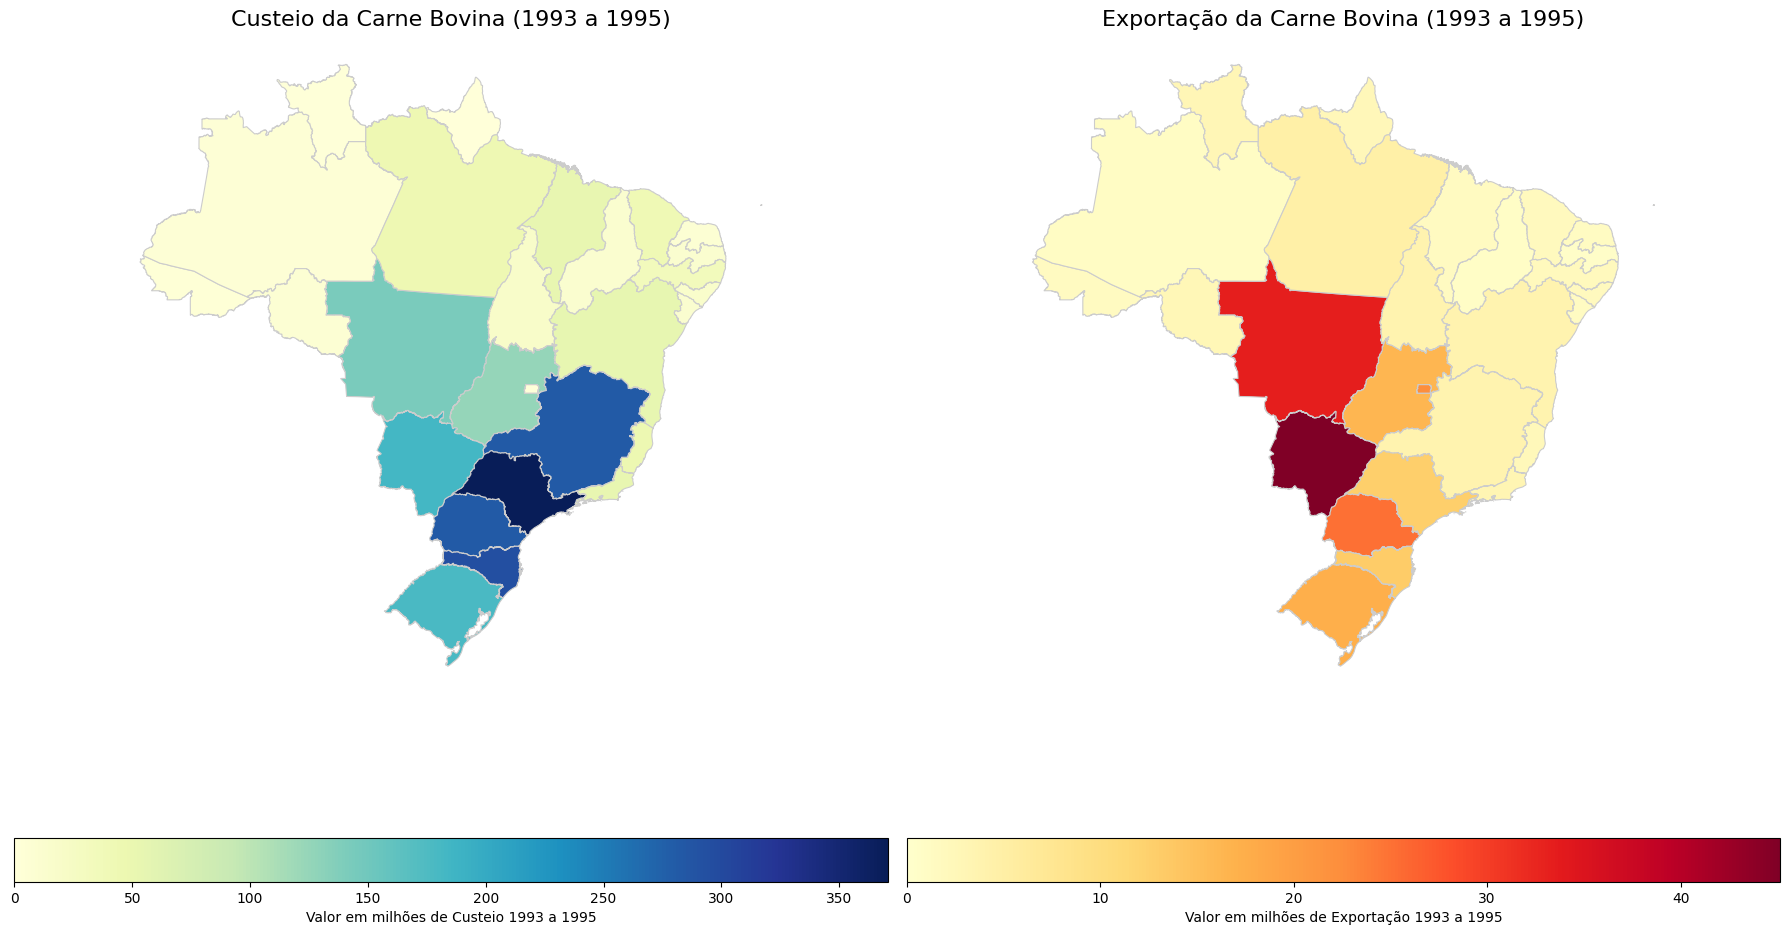

<ipython-input-14-81ef6de49715>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custeio[coluna_custeio] = custeio[coluna_custeio] / 1_000_000  # Dividir por 1 milhão
<ipython-input-14-81ef6de49715>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao[coluna_exportacao] = exportacao[coluna_exportacao] / 1_000_000  # Dividir por 1 milhão


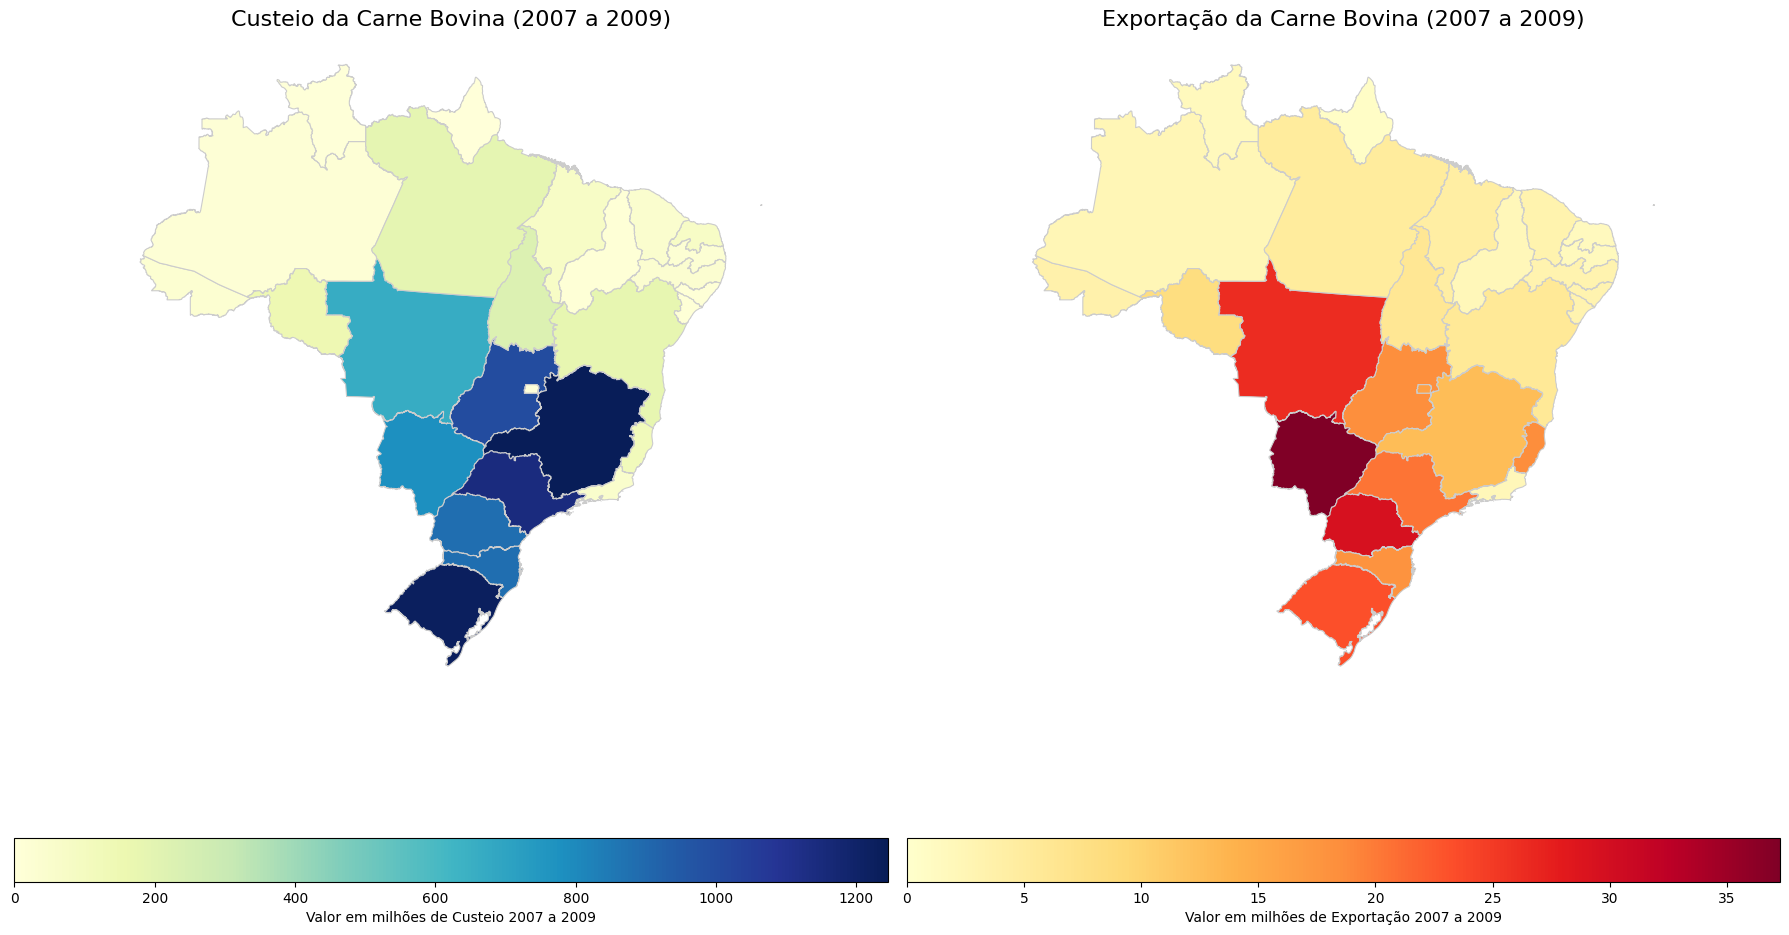

<ipython-input-14-81ef6de49715>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custeio[coluna_custeio] = custeio[coluna_custeio] / 1_000_000  # Dividir por 1 milhão
<ipython-input-14-81ef6de49715>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao[coluna_exportacao] = exportacao[coluna_exportacao] / 1_000_000  # Dividir por 1 milhão


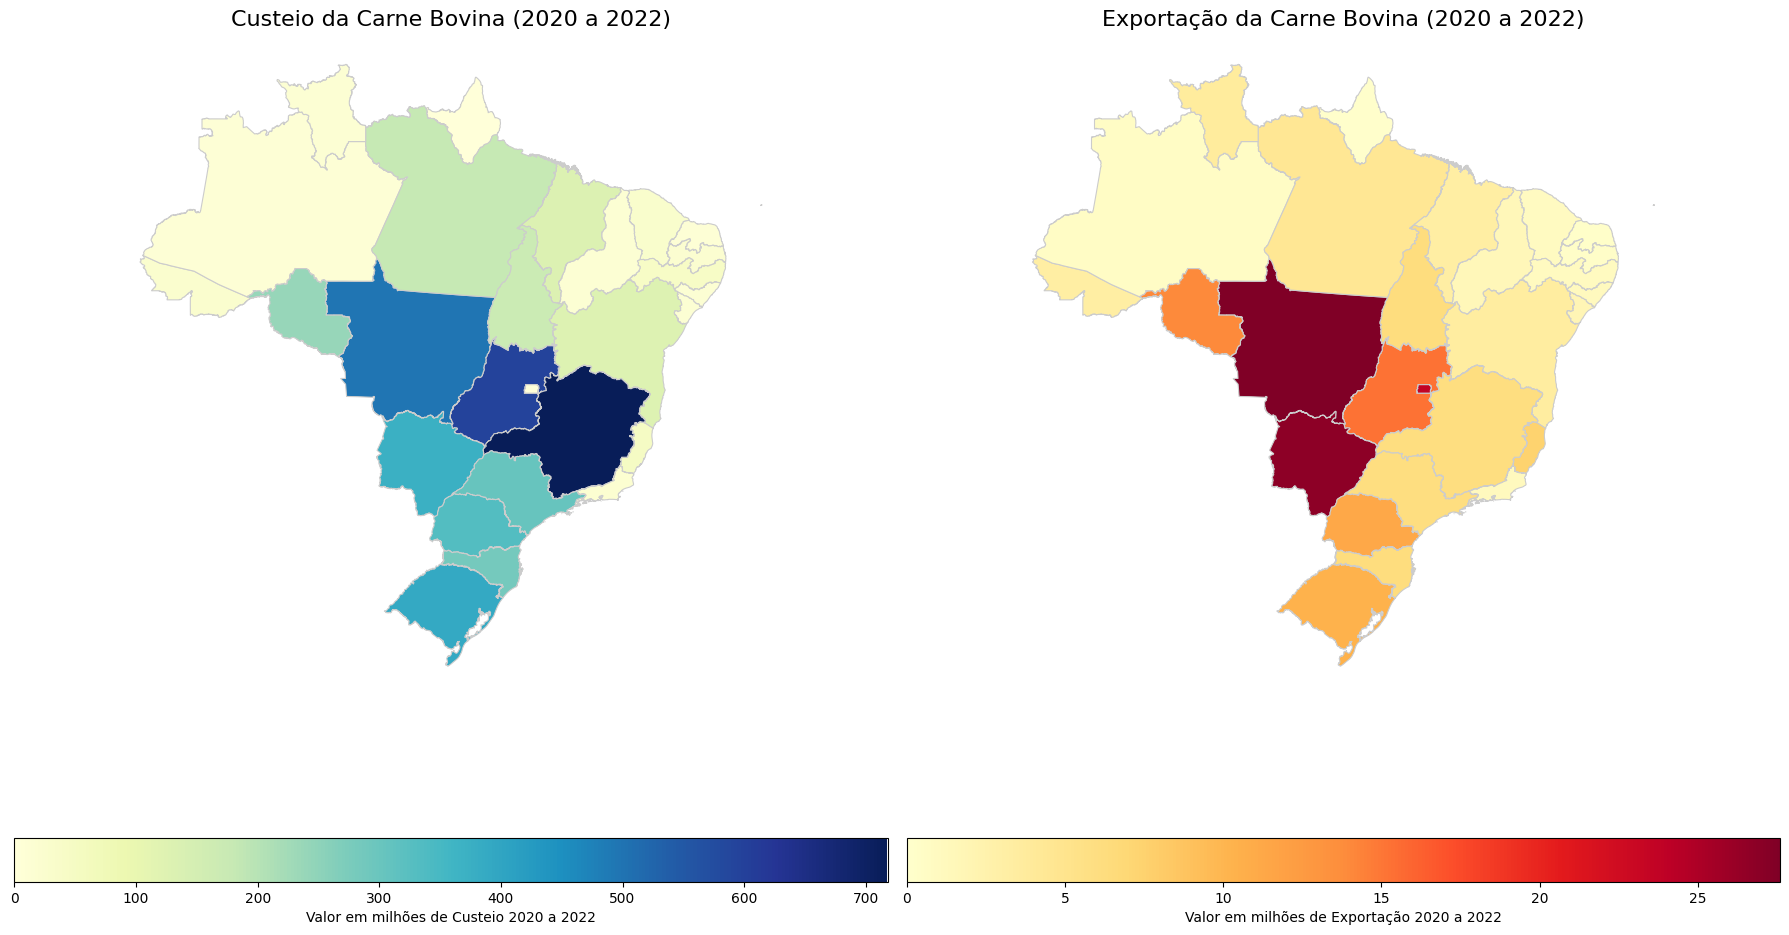

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Ler os dados do arquivo Excel
file_path = '/content/custeio.xlsx'  # ajuste o caminho se necessário
custeio_df = pd.read_excel(file_path, sheet_name='Planilha1')
exportacao_df = pd.read_excel(file_path, sheet_name='Planilha2')

# Carregar o mapa dos estados do Brasil
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Criar dicionário de nome para sigla
estado_para_sigla = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}
mapa_brasil['Sigla'] = mapa_brasil['name'].map(estado_para_sigla)

# Função para gerar os mapas lado a lado
def plotar_mapa(periodo):
    # Pegar as colunas corretas
    coluna_custeio = f'Custeio {periodo}'
    coluna_exportacao = f'Exportação {periodo}'  # Usando a coluna de exportação

    # Preparar os dados
    custeio = custeio_df[['Região', coluna_custeio]]
    exportacao = exportacao_df[['Região', coluna_exportacao]]

    # Converter os valores para milhões
    custeio[coluna_custeio] = custeio[coluna_custeio] / 1_000_000  # Dividir por 1 milhão
    exportacao[coluna_exportacao] = exportacao[coluna_exportacao] / 1_000_000  # Dividir por 1 milhão

    # Juntar com o mapa
    mapa_custeio = mapa_brasil.merge(custeio, left_on='Sigla', right_on='Região')
    mapa_exportacao = mapa_brasil.merge(exportacao, left_on='Sigla', right_on='Região')

    # Definir máximos para escala
    vmax_custeio = mapa_custeio[coluna_custeio].max()
    vmax_exportacao = mapa_exportacao[coluna_exportacao].max()

    # Plotar os mapas lado a lado
    fig, ax = plt.subplots(1, 2, figsize=(18, 10))  # Subplots lado a lado

    # Mapa de custeio
    mapa_custeio.plot(
        column=coluna_custeio,
        cmap='YlGnBu',
        linewidth=0.8,
        edgecolor='0.8',
        legend=True,
        legend_kwds={'label': f'Valor em milhões de {coluna_custeio}', 'orientation': 'horizontal'},
        vmin=0,
        vmax=vmax_custeio,
        ax=ax[0]
    )
    ax[0].set_title(f'Custeio da Carne Bovina ({periodo})', fontsize=16)
    ax[0].axis('off')

    # Mapa de exportação
    mapa_exportacao.plot(
        column=coluna_exportacao,
        cmap='YlOrRd',
        linewidth=0.8,
        edgecolor='0.8',
        legend=True,
        legend_kwds={'label': f'Valor em milhões de {coluna_exportacao}', 'orientation': 'horizontal'},
        vmin=0,
        vmax=vmax_exportacao,
        ax=ax[1]
    )
    ax[1].set_title(f'Exportação da Carne Bovina ({periodo})', fontsize=16)
    ax[1].axis('off')

    # Exibir os mapas
    plt.tight_layout()
    plt.show()

# Chamar a função para todos os períodos
periodos = ['1993 a 1995', '2007 a 2009', '2020 a 2022']

for periodo in periodos:
    plotar_mapa(periodo)


<ipython-input-15-bc0c9054ec03>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custeio[coluna_custeio] = custeio[coluna_custeio] / 1_000_000  # Dividir por 1 milhão
<ipython-input-15-bc0c9054ec03>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao[coluna_exportacao] = exportacao[coluna_exportacao] / 1_000_000  # Dividir por 1 milhão
<ipython-input-15-bc0c9054ec03>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

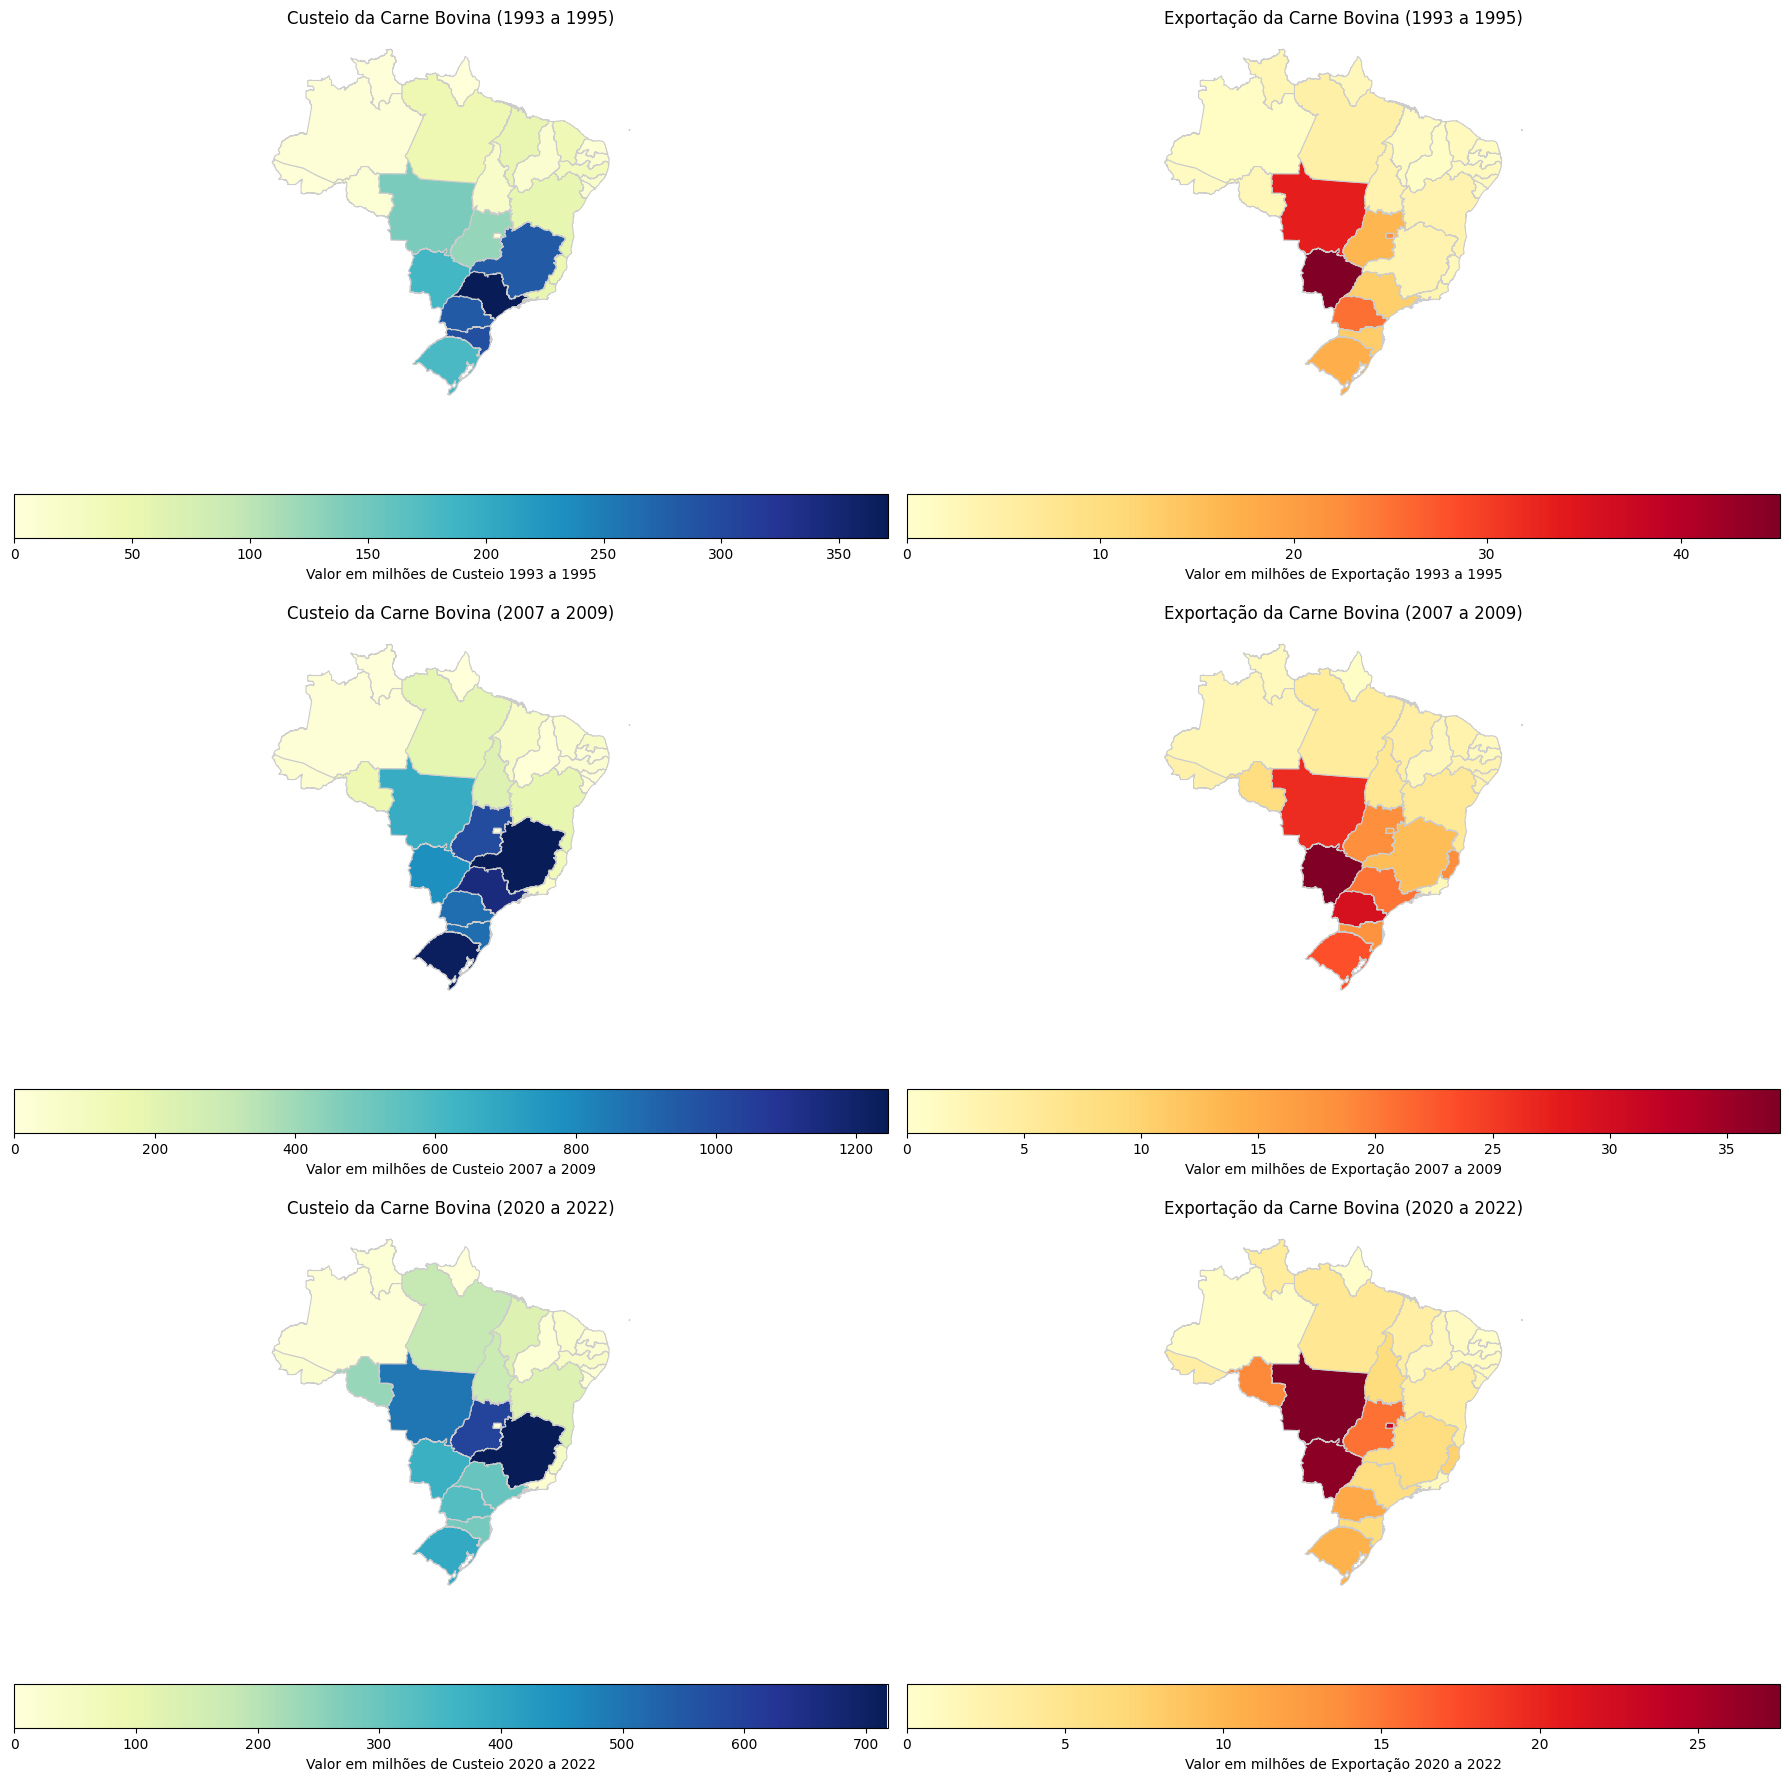

In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Ler os dados do arquivo Excel
file_path = '/content/custeio.xlsx'  # ajuste o caminho se necessário
custeio_df = pd.read_excel(file_path, sheet_name='Planilha1')
exportacao_df = pd.read_excel(file_path, sheet_name='Planilha2')

# Carregar o mapa dos estados do Brasil
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Criar dicionário de nome para sigla
estado_para_sigla = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}
mapa_brasil['Sigla'] = mapa_brasil['name'].map(estado_para_sigla)

# Função para gerar os mapas lado a lado
def plotar_mapa(periodo, ax1, ax2):
    # Pegar as colunas corretas
    coluna_custeio = f'Custeio {periodo}'
    coluna_exportacao = f'Exportação {periodo}'  # Usando a coluna de exportação

    # Preparar os dados
    custeio = custeio_df[['Região', coluna_custeio]]
    exportacao = exportacao_df[['Região', coluna_exportacao]]

    # Converter os valores para milhões
    custeio[coluna_custeio] = custeio[coluna_custeio] / 1_000_000  # Dividir por 1 milhão
    exportacao[coluna_exportacao] = exportacao[coluna_exportacao] / 1_000_000  # Dividir por 1 milhão

    # Juntar com o mapa
    mapa_custeio = mapa_brasil.merge(custeio, left_on='Sigla', right_on='Região')
    mapa_exportacao = mapa_brasil.merge(exportacao, left_on='Sigla', right_on='Região')

    # Definir máximos para escala
    vmax_custeio = mapa_custeio[coluna_custeio].max()
    vmax_exportacao = mapa_exportacao[coluna_exportacao].max()

    # Mapa de custeio
    mapa_custeio.plot(
        column=coluna_custeio,
        cmap='YlGnBu',
        linewidth=0.8,
        edgecolor='0.8',
        legend=True,
        legend_kwds={'label': f'Valor em milhões de {coluna_custeio}', 'orientation': 'horizontal'},
        vmin=0,
        vmax=vmax_custeio,
        ax=ax1
    )
    ax1.set_title(f'Custeio da Carne Bovina ({periodo})', fontsize=12)
    ax1.axis('off')

    # Mapa de exportação
    mapa_exportacao.plot(
        column=coluna_exportacao,
        cmap='YlOrRd',
        linewidth=0.8,
        edgecolor='0.8',
        legend=True,
        legend_kwds={'label': f'Valor em milhões de {coluna_exportacao}', 'orientation': 'horizontal'},
        vmin=0,
        vmax=vmax_exportacao,
        ax=ax2
    )
    ax2.set_title(f'Exportação da Carne Bovina ({periodo})', fontsize=12)
    ax2.axis('off')

# Criar uma figura com 6 subgráficos (3 períodos, 2 mapas por período)
fig, axs = plt.subplots(3, 2, figsize=(18, 18))  # 3 linhas e 2 colunas

# Chamar a função para todos os períodos e colocar os mapas nos subgráficos
periodos = ['1993 a 1995', '2007 a 2009', '2020 a 2022']
for i, periodo in enumerate(periodos):
    plotar_mapa(periodo, axs[i, 0], axs[i, 1])

# Ajustar o layout e mostrar
plt.tight_layout()
plt.show()


<ipython-input-16-bcd77d2df9bd>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custeio[coluna_custeio] = custeio[coluna_custeio] / 1_000_000  # Dividir por 1 milhão
<ipython-input-16-bcd77d2df9bd>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao[coluna_exportacao] = exportacao[coluna_exportacao] / 1_000_000  # Dividir por 1 milhão
<ipython-input-16-bcd77d2df9bd>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

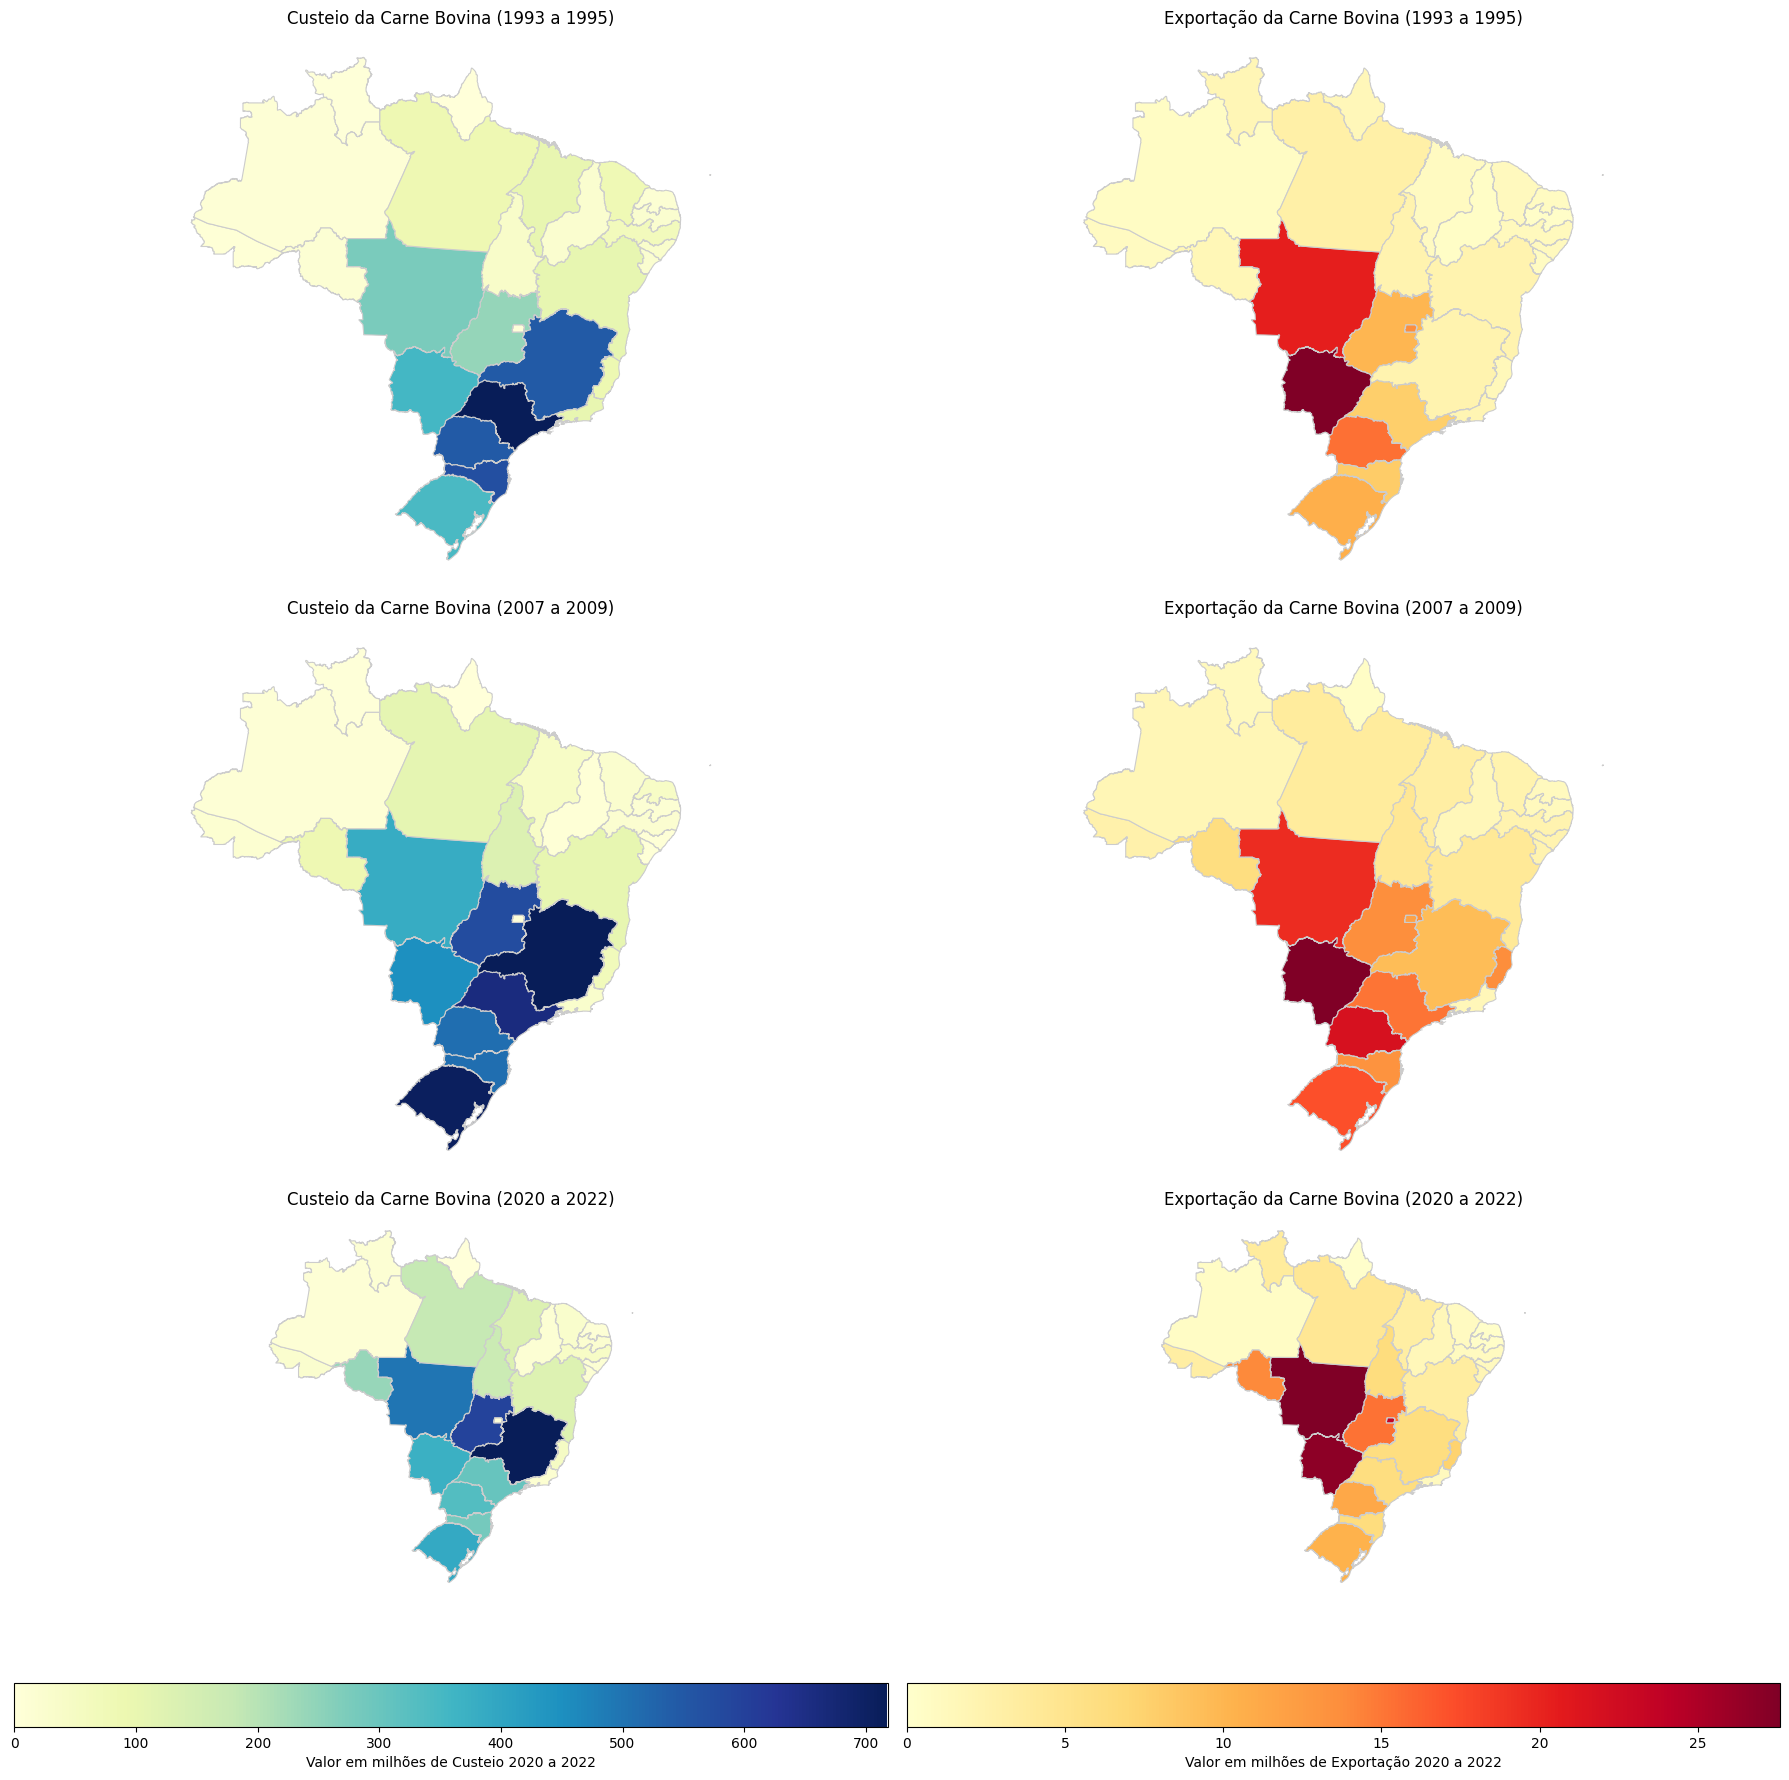

In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Ler os dados do arquivo Excel
file_path = '/content/custeio.xlsx'  # ajuste o caminho se necessário
custeio_df = pd.read_excel(file_path, sheet_name='Planilha1')
exportacao_df = pd.read_excel(file_path, sheet_name='Planilha2')

# Carregar o mapa dos estados do Brasil
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Criar dicionário de nome para sigla
estado_para_sigla = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}
mapa_brasil['Sigla'] = mapa_brasil['name'].map(estado_para_sigla)

# Função para gerar os mapas lado a lado
def plotar_mapa(periodo, ax1, ax2, show_legend=False):
    # Pegar as colunas corretas
    coluna_custeio = f'Custeio {periodo}'
    coluna_exportacao = f'Exportação {periodo}'  # Usando a coluna de exportação

    # Preparar os dados
    custeio = custeio_df[['Região', coluna_custeio]]
    exportacao = exportacao_df[['Região', coluna_exportacao]]

    # Converter os valores para milhões
    custeio[coluna_custeio] = custeio[coluna_custeio] / 1_000_000  # Dividir por 1 milhão
    exportacao[coluna_exportacao] = exportacao[coluna_exportacao] / 1_000_000  # Dividir por 1 milhão

    # Juntar com o mapa
    mapa_custeio = mapa_brasil.merge(custeio, left_on='Sigla', right_on='Região')
    mapa_exportacao = mapa_brasil.merge(exportacao, left_on='Sigla', right_on='Região')

    # Definir máximos para escala
    vmax_custeio = mapa_custeio[coluna_custeio].max()
    vmax_exportacao = mapa_exportacao[coluna_exportacao].max()

    # Mapa de custeio
    mapa_custeio.plot(
        column=coluna_custeio,
        cmap='YlGnBu',
        linewidth=0.8,
        edgecolor='0.8',
        legend=show_legend,
        legend_kwds={'label': f'Valor em milhões de {coluna_custeio}', 'orientation': 'horizontal'},
        vmin=0,
        vmax=vmax_custeio,
        ax=ax1
    )
    ax1.set_title(f'Custeio da Carne Bovina ({periodo})', fontsize=12)
    ax1.axis('off')

    # Mapa de exportação
    mapa_exportacao.plot(
        column=coluna_exportacao,
        cmap='YlOrRd',
        linewidth=0.8,
        edgecolor='0.8',
        legend=show_legend,
        legend_kwds={'label': f'Valor em milhões de {coluna_exportacao}', 'orientation': 'horizontal'},
        vmin=0,
        vmax=vmax_exportacao,
        ax=ax2
    )
    ax2.set_title(f'Exportação da Carne Bovina ({periodo})', fontsize=12)
    ax2.axis('off')

# Criar uma figura com 6 subgráficos (3 períodos, 2 mapas por período)
fig, axs = plt.subplots(3, 2, figsize=(18, 18))  # 3 linhas e 2 colunas

# Chamar a função para todos os períodos e colocar os mapas nos subgráficos
periodos = ['1993 a 1995', '2007 a 2009', '2020 a 2022']
for i, periodo in enumerate(periodos):
    # Para os dois últimos gráficos (do período 2020 a 2022), a legenda será mostrada
    if periodo == '2020 a 2022':
        plotar_mapa(periodo, axs[i, 0], axs[i, 1], show_legend=True)
    else:
        plotar_mapa(periodo, axs[i, 0], axs[i, 1], show_legend=False)

# Ajustar o layout e mostrar
plt.tight_layout()
plt.show()


<ipython-input-17-7b1160eb4c30>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custeio[coluna_custeio] = custeio[coluna_custeio] / 1_000_000  # Dividir por 1 milhão
<ipython-input-17-7b1160eb4c30>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao[coluna_exportacao] = exportacao[coluna_exportacao] / 1_000_000  # Dividir por 1 milhão
<ipython-input-17-7b1160eb4c30>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

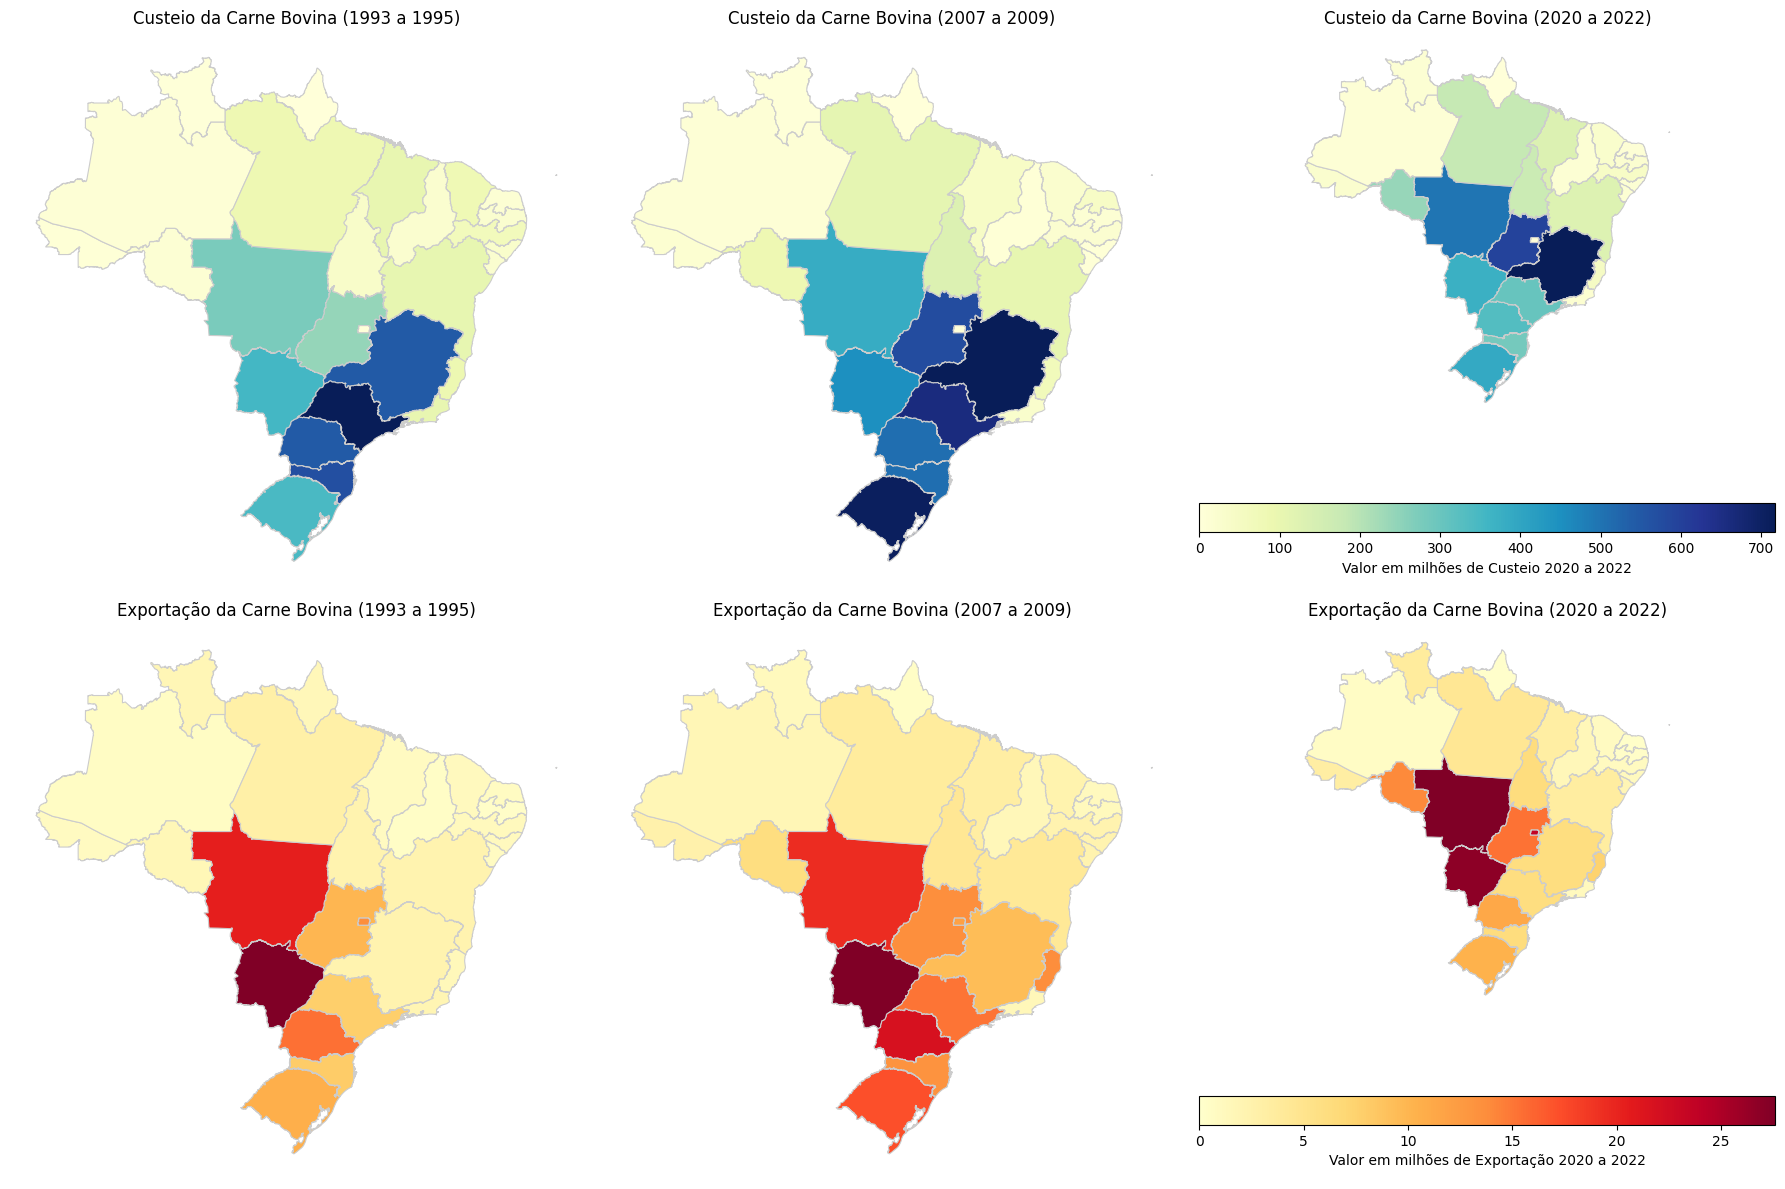

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Ler os dados do arquivo Excel
file_path = '/content/custeio.xlsx'  # ajuste o caminho se necessário
custeio_df = pd.read_excel(file_path, sheet_name='Planilha1')
exportacao_df = pd.read_excel(file_path, sheet_name='Planilha2')

# Carregar o mapa dos estados do Brasil
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Criar dicionário de nome para sigla
estado_para_sigla = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}
mapa_brasil['Sigla'] = mapa_brasil['name'].map(estado_para_sigla)

# Função para gerar os mapas lado a lado
def plotar_mapa(periodo, ax1, ax2, show_legend=False):
    # Pegar as colunas corretas
    coluna_custeio = f'Custeio {periodo}'
    coluna_exportacao = f'Exportação {periodo}'  # Usando a coluna de exportação

    # Preparar os dados
    custeio = custeio_df[['Região', coluna_custeio]]
    exportacao = exportacao_df[['Região', coluna_exportacao]]

    # Converter os valores para milhões
    custeio[coluna_custeio] = custeio[coluna_custeio] / 1_000_000  # Dividir por 1 milhão
    exportacao[coluna_exportacao] = exportacao[coluna_exportacao] / 1_000_000  # Dividir por 1 milhão

    # Juntar com o mapa
    mapa_custeio = mapa_brasil.merge(custeio, left_on='Sigla', right_on='Região')
    mapa_exportacao = mapa_brasil.merge(exportacao, left_on='Sigla', right_on='Região')

    # Definir máximos para escala
    vmax_custeio = mapa_custeio[coluna_custeio].max()
    vmax_exportacao = mapa_exportacao[coluna_exportacao].max()

    # Mapa de custeio
    mapa_custeio.plot(
        column=coluna_custeio,
        cmap='YlGnBu',
        linewidth=0.8,
        edgecolor='0.8',
        legend=show_legend,
        legend_kwds={'label': f'Valor em milhões de {coluna_custeio}', 'orientation': 'horizontal'},
        vmin=0,
        vmax=vmax_custeio,
        ax=ax1
    )
    ax1.set_title(f'Custeio da Carne Bovina ({periodo})', fontsize=12)
    ax1.axis('off')

    # Mapa de exportação
    mapa_exportacao.plot(
        column=coluna_exportacao,
        cmap='YlOrRd',
        linewidth=0.8,
        edgecolor='0.8',
        legend=show_legend,
        legend_kwds={'label': f'Valor em milhões de {coluna_exportacao}', 'orientation': 'horizontal'},
        vmin=0,
        vmax=vmax_exportacao,
        ax=ax2
    )
    ax2.set_title(f'Exportação da Carne Bovina ({periodo})', fontsize=12)
    ax2.axis('off')

# Criar uma figura com 2 linhas e 3 colunas (1 linha para Custeio e 1 linha para Exportação)
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # 2 linhas e 3 colunas

# Chamar a função para todos os períodos e colocar os mapas nos subgráficos
periodos = ['1993 a 1995', '2007 a 2009', '2020 a 2022']
for i, periodo in enumerate(periodos):
    # Para os dois últimos gráficos (do período 2020 a 2022), a legenda será mostrada
    if periodo == '2020 a 2022':
        plotar_mapa(periodo, axs[0, i], axs[1, i], show_legend=True)
    else:
        plotar_mapa(periodo, axs[0, i], axs[1, i], show_legend=False)

# Ajustar o layout e mostrar
plt.tight_layout()
plt.show()


<ipython-input-19-8ec9a7067dd1>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custeio[coluna_custeio] = custeio[coluna_custeio] / 1_000_000  # Dividir por 1 milhão
<ipython-input-19-8ec9a7067dd1>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportacao[coluna_exportacao] = exportacao[coluna_exportacao] / 1_000_000  # Dividir por 1 milhão
<ipython-input-19-8ec9a7067dd1>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

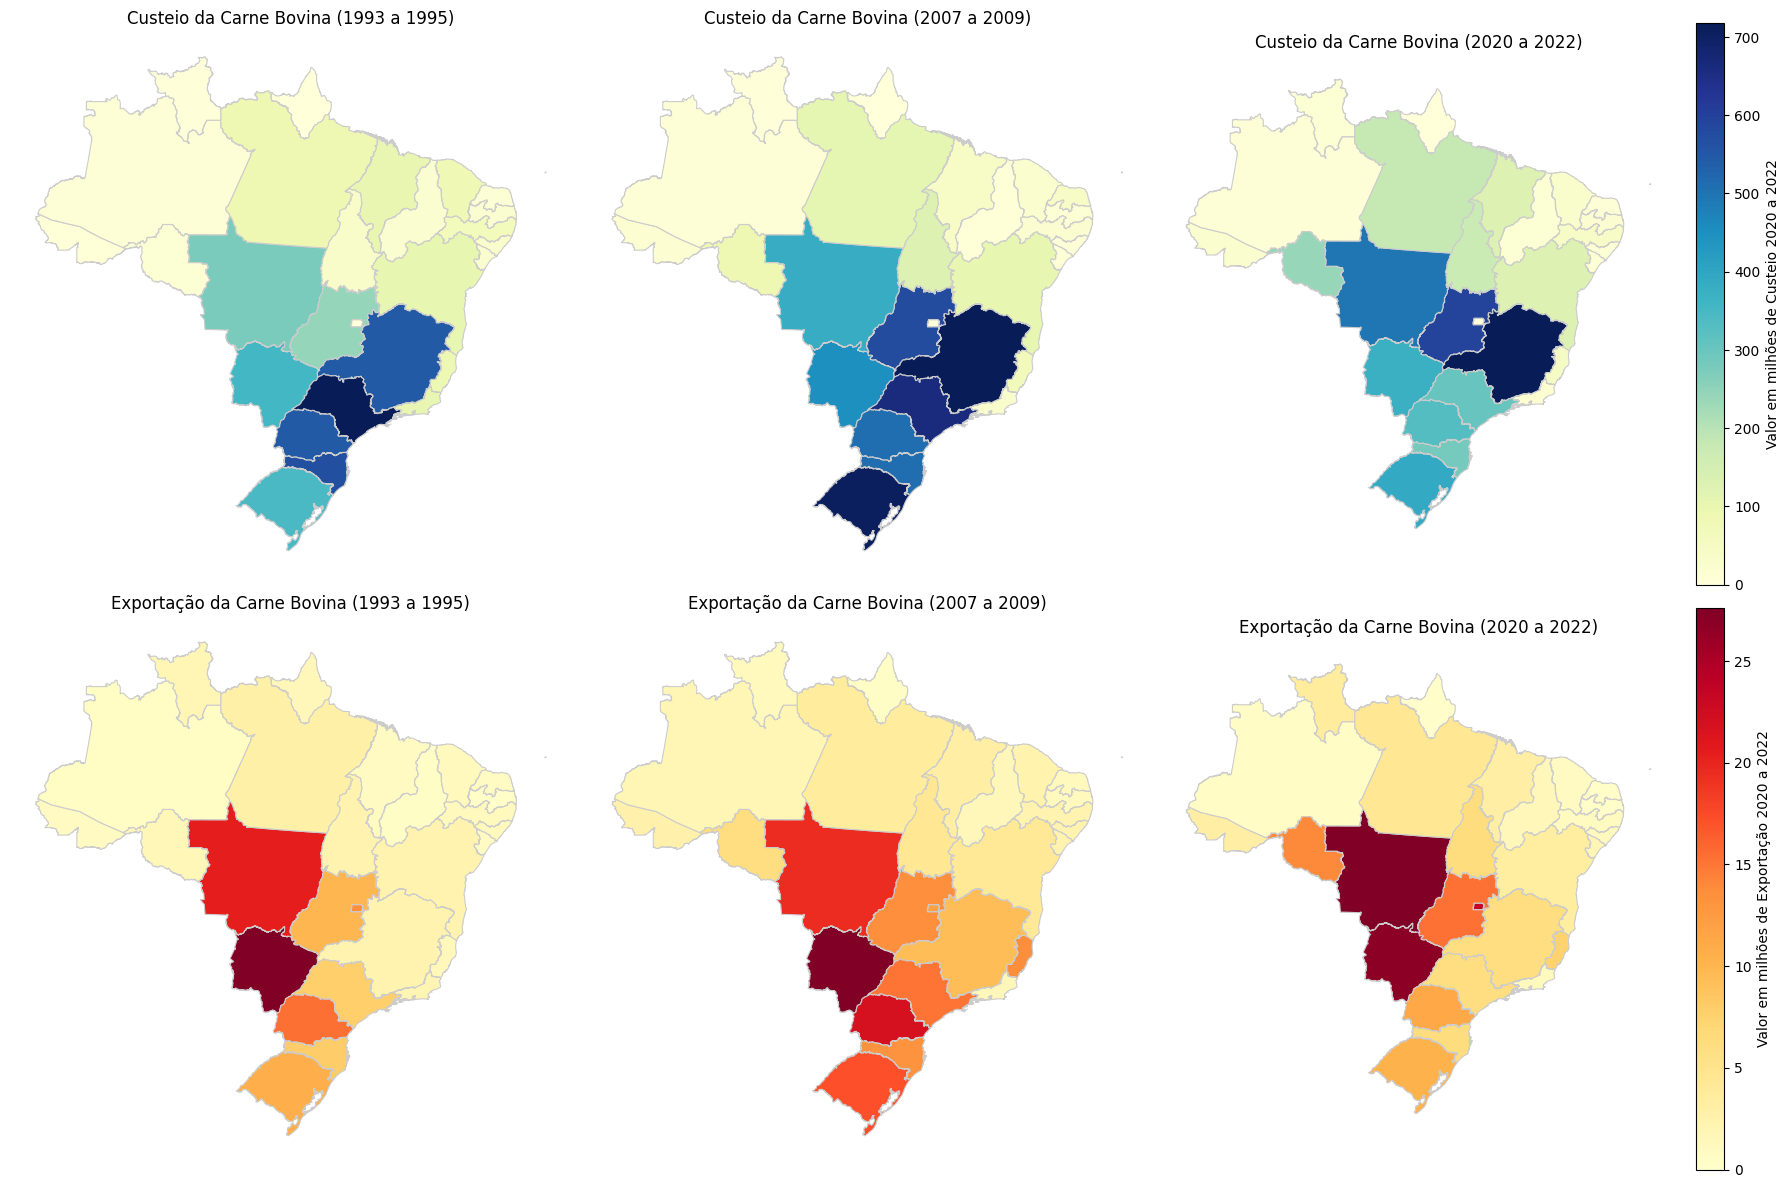

In [19]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Ler os dados do arquivo Excel
file_path = '/content/custeio.xlsx'  # ajuste o caminho se necessário
custeio_df = pd.read_excel(file_path, sheet_name='Planilha1')
exportacao_df = pd.read_excel(file_path, sheet_name='Planilha2')

# Carregar o mapa dos estados do Brasil
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# Criar dicionário de nome para sigla
estado_para_sigla = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
    'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
    'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
    'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
    'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}
mapa_brasil['Sigla'] = mapa_brasil['name'].map(estado_para_sigla)

# Função para gerar os mapas lado a lado
def plotar_mapa(periodo, ax1, ax2, show_legend=False):
    # Pegar as colunas corretas
    coluna_custeio = f'Custeio {periodo}'
    coluna_exportacao = f'Exportação {periodo}'  # Usando a coluna de exportação

    # Preparar os dados
    custeio = custeio_df[['Região', coluna_custeio]]
    exportacao = exportacao_df[['Região', coluna_exportacao]]

    # Converter os valores para milhões
    custeio[coluna_custeio] = custeio[coluna_custeio] / 1_000_000  # Dividir por 1 milhão
    exportacao[coluna_exportacao] = exportacao[coluna_exportacao] / 1_000_000  # Dividir por 1 milhão

    # Juntar com o mapa
    mapa_custeio = mapa_brasil.merge(custeio, left_on='Sigla', right_on='Região')
    mapa_exportacao = mapa_brasil.merge(exportacao, left_on='Sigla', right_on='Região')

    # Definir máximos para escala
    vmax_custeio = mapa_custeio[coluna_custeio].max()
    vmax_exportacao = mapa_exportacao[coluna_exportacao].max()

    # Mapa de custeio
    mapa_custeio.plot(
        column=coluna_custeio,
        cmap='YlGnBu',
        linewidth=0.8,
        edgecolor='0.8',
        legend=show_legend,
        legend_kwds={'label': f'Valor em milhões de {coluna_custeio}', 'orientation': 'vertical', 'fraction': 0.05, 'pad': 0.04},
        vmin=0,
        vmax=vmax_custeio,
        ax=ax1
    )
    ax1.set_title(f'Custeio da Carne Bovina ({periodo})', fontsize=12)
    ax1.axis('off')

    # Mapa de exportação
    mapa_exportacao.plot(
        column=coluna_exportacao,
        cmap='YlOrRd',
        linewidth=0.8,
        edgecolor='0.8',
        legend=show_legend,
        legend_kwds={'label': f'Valor em milhões de {coluna_exportacao}', 'orientation': 'vertical', 'fraction': 0.05, 'pad': 0.04},
        vmin=0,
        vmax=vmax_exportacao,
        ax=ax2
    )
    ax2.set_title(f'Exportação da Carne Bovina ({periodo})', fontsize=12)
    ax2.axis('off')

# Criar uma figura com 2 linhas e 3 colunas (1 linha para Custeio e 1 linha para Exportação)
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # 2 linhas e 3 colunas

# Chamar a função para todos os períodos e colocar os mapas nos subgráficos
periodos = ['1993 a 1995', '2007 a 2009', '2020 a 2022']
for i, periodo in enumerate(periodos):
    # Para os dois últimos gráficos (do período 2020 a 2022), a legenda será mostrada
    if periodo == '2020 a 2022':
        plotar_mapa(periodo, axs[0, i], axs[1, i], show_legend=True)
    else:
        plotar_mapa(periodo, axs[0, i], axs[1, i], show_legend=False)

# Ajustar o layout e mostrar
plt.tight_layout()
plt.show()
